In [2]:
#Install packages:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.patches as mpatches

import requests
import math
import csv
import plotly.express as px
import seaborn as sns

In [3]:
#read characteristics and metadata from csv to df:
df = pd.read_csv('../analysis/General_characteristics_and_metadata.csv')

In [4]:
df

,Unnamed: 0,Data set name,Access type,Access details,Link to dataset,Citatation,Country of origin,Year of dataset publication,Version,"Last updated, year",...,Image format,View position,Labels (Image feature labels),Diseases included,Patient age,Patient gender,Ratio sex (f/m/na),Patient race/ethnicity,Comments,Also cite:
0,0,Belarus,No access,Link not available anymore,https://tbportals.niaid.nih.gov,NaN,Belarus,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Clark K, Vendt B, Smith K, Freymann J, Kirby J..."
1,1,BIMCV-COVID19+,Open access,"Create google account, submission of personal ...",https://bimcv.cipf.es/bimcv-projects/bimcv-cov...,"Vayá, M. D. L. I., Saborit, J. M., Montell, J....",Spain,2020,3,2023,...,PNG,"frontal,lateral",NR,"Covid-19, increased density, pneumonia, unchan...",44824,44824,45.9/54.1,0.0,NaN,NaN
2,2,BRAX,Regulated access,"Submit personal details, complete required tra...",https://physionet.org/content/brax/1.1.0/,"Reis, E. P., Paiva, J., Bueno da Silva, M. C.,...",Brazil,2022,1.1.0,2022,...,DICOM,"Frontal,lateral",14,"Enlarged Cardiomediastinum, Cardiomegaly, Lung...",40967,40967,NaN,0.0,Age is reported in 5-year groups,"Goldberger, A., Amaral, L., Glass, L., Hausdor..."
3,3,CANDID-PTX,Regulated access,Complete online ethics course and sign data us...,https://figshare.com/articles/dataset/CANDID-P...,"Feng, Sijing; Azzollini, Damian; Kim, Ji Soo; ...",New Zealand,2021,NR,2021,...,DICOM,Frontal,4,"Pneumothorax, no pneumothorax, unsure positive...",19237,192030,NaN,0.0,NaN,NaN
4,4,Chest x-ray disease images,Open access,Create Kaggle account to download zip-file,https://www.kaggle.com/datasets/parsagouran/ch...,NR,NR,2023,NR,2023,...,"jpg, jpeg",NR,NR,NR,0,0,0,0.0,NaN,NaN
5,5,Chest X-Rays - Covid19 Pakistan,Open access,Downloadable zip-file,https://data.mendeley.com/datasets/fvp7m8c9ss,"Malik, Hassaan (2020), “Chest X-rays of COVID-...",Pakistan,2020,1,2020,...,JPEG,Frontal,2,"Covid-19, non-covid-19",0,0,0,0.0,NaN,NaN
6,6,Chest X-Rays Dataset,Open access,Create Kaggle account to download zip-file,https://datasetsearch.research.google.com/sear...,NR,NR,2018,NR,2018,...,"jpg, jpeg, png, gif",NR,5,"Atelectasis, Infiltration, Effusion, Cardiomeg...",0,0,0,0.0,NaN,NaN
7,7,CHEST-XRAY-PNEUMONIA,Regulated access,Create IEEE port account and pay,https://ieee-dataport.org/documents/chest-xray...,"Anubhav Saha, Yateendra Mishra, May 7, 2021, ""...",NR,2021,NR,2021,...,NR,NR,NR,Pneumonia,NR,NR,NaN,NaN,NaN,NaN
8,8,ChestX-ray14,Open access,Link to data,https://nihcc.app.box.com/v/ChestXray-NIHCC,"Wang, Xiaosong & Peng, Yifan & Lu, Le & Lu, Zh...",USA,2017,NR,2020,...,png,"AP, PA",14,"Atelectasis, Infiltration, Pneumothorax, Effus...",112120,112120,43.5/56.5,0.0,NaN,NaN
9,9,CheXpert,Open access,Create Standford AIMI account and download zip...,https://stanfordmlgroup.github.io/competitions...,"Irvin, Jeremy, et al. ""Chexpert: A large chest...",USA,2019,1.0,2019,...,jpg,"Frontal,lateral",14,No Finding Enlarged Cardiom. Cardiomegaly Lung...,223414,223414,40.6/59.4,0.0,NaN,NaN


In [5]:
#drop unnamed column:
df = df.drop(['Unnamed: 0'], axis=1)

In [6]:
#rename columns:
df = df.rename(columns={"Data set name": "Name", "Link to dataset":"Link", "Year of dataset publication":"Year of publication", "Labels (Image feature labels)":"Labels"})

In [7]:
#check the access types:
df['Access type'].unique()

array(['No access', 'Open access', 'Regulated access'], dtype=object)

In [8]:
#remove no access from df:
df = df[df['Access type'] != "No access"]

In [9]:
df

,Name,Access type,Access details,Link,Citatation,Country of origin,Year of publication,Version,"Last updated, year",Acquires from other dataset:,...,Image format,View position,Labels,Diseases included,Patient age,Patient gender,Ratio sex (f/m/na),Patient race/ethnicity,Comments,Also cite:
1,BIMCV-COVID19+,Open access,"Create google account, submission of personal ...",https://bimcv.cipf.es/bimcv-projects/bimcv-cov...,"Vayá, M. D. L. I., Saborit, J. M., Montell, J....",Spain,2020,3,2023,Padchest,...,PNG,"frontal,lateral",NR,"Covid-19, increased density, pneumonia, unchan...",44824,44824,45.9/54.1,0.0,NaN,NaN
2,BRAX,Regulated access,"Submit personal details, complete required tra...",https://physionet.org/content/brax/1.1.0/,"Reis, E. P., Paiva, J., Bueno da Silva, M. C.,...",Brazil,2022,1.1.0,2022,NR,...,DICOM,"Frontal,lateral",14,"Enlarged Cardiomediastinum, Cardiomegaly, Lung...",40967,40967,NaN,0.0,Age is reported in 5-year groups,"Goldberger, A., Amaral, L., Glass, L., Hausdor..."
3,CANDID-PTX,Regulated access,Complete online ethics course and sign data us...,https://figshare.com/articles/dataset/CANDID-P...,"Feng, Sijing; Azzollini, Damian; Kim, Ji Soo; ...",New Zealand,2021,NR,2021,NR,...,DICOM,Frontal,4,"Pneumothorax, no pneumothorax, unsure positive...",19237,192030,NaN,0.0,NaN,NaN
4,Chest x-ray disease images,Open access,Create Kaggle account to download zip-file,https://www.kaggle.com/datasets/parsagouran/ch...,NR,NR,2023,NR,2023,NR,...,"jpg, jpeg",NR,NR,NR,0,0,0,0.0,NaN,NaN
5,Chest X-Rays - Covid19 Pakistan,Open access,Downloadable zip-file,https://data.mendeley.com/datasets/fvp7m8c9ss,"Malik, Hassaan (2020), “Chest X-rays of COVID-...",Pakistan,2020,1,2020,NR,...,JPEG,Frontal,2,"Covid-19, non-covid-19",0,0,0,0.0,NaN,NaN
6,Chest X-Rays Dataset,Open access,Create Kaggle account to download zip-file,https://datasetsearch.research.google.com/sear...,NR,NR,2018,NR,2018,NR,...,"jpg, jpeg, png, gif",NR,5,"Atelectasis, Infiltration, Effusion, Cardiomeg...",0,0,0,0.0,NaN,NaN
7,CHEST-XRAY-PNEUMONIA,Regulated access,Create IEEE port account and pay,https://ieee-dataport.org/documents/chest-xray...,"Anubhav Saha, Yateendra Mishra, May 7, 2021, ""...",NR,2021,NR,2021,NR,...,NR,NR,NR,Pneumonia,NR,NR,NaN,NaN,NaN,NaN
8,ChestX-ray14,Open access,Link to data,https://nihcc.app.box.com/v/ChestXray-NIHCC,"Wang, Xiaosong & Peng, Yifan & Lu, Le & Lu, Zh...",USA,2017,NR,2020,ChestX-ray8,...,png,"AP, PA",14,"Atelectasis, Infiltration, Pneumothorax, Effus...",112120,112120,43.5/56.5,0.0,NaN,NaN
9,CheXpert,Open access,Create Standford AIMI account and download zip...,https://stanfordmlgroup.github.io/competitions...,"Irvin, Jeremy, et al. ""Chexpert: A large chest...",USA,2019,1.0,2019,NR,...,jpg,"Frontal,lateral",14,No Finding Enlarged Cardiom. Cardiomegaly Lung...,223414,223414,40.6/59.4,0.0,NaN,NaN
10,COVID 19 Xray Image Dataset with Huge Samples,Open access,Create Kaggle account to download zip-file,https://www.kaggle.com/datasets/mr3suvhro/covi...,NR,NR,2020,NR,2020,NR,...,"png, jpeg, jpg",NR,NR,"Covid-19, non-covid-19",0,0,NaN,0.0,NaN,NaN


In [10]:
#Count open access/regulated access:
df.groupby(df['Access type'])[['Name']].count()

,Name
Access type,
Open access,31
Regulated access,8


In [11]:
#save all open access/regulated access datasets in seperate dataframes:
oa_df = df[df['Access type'] == "Open access"]
regulated_df=df[df['Access type'] == "Regulated access"]

In [12]:
oa_df

,Name,Access type,Access details,Link,Citatation,Country of origin,Year of publication,Version,"Last updated, year",Acquires from other dataset:,...,Image format,View position,Labels,Diseases included,Patient age,Patient gender,Ratio sex (f/m/na),Patient race/ethnicity,Comments,Also cite:
1,BIMCV-COVID19+,Open access,"Create google account, submission of personal ...",https://bimcv.cipf.es/bimcv-projects/bimcv-cov...,"Vayá, M. D. L. I., Saborit, J. M., Montell, J....",Spain,2020,3,2023,Padchest,...,PNG,"frontal,lateral",NR,"Covid-19, increased density, pneumonia, unchan...",44824,44824,45.9/54.1,0.0,NaN,NaN
4,Chest x-ray disease images,Open access,Create Kaggle account to download zip-file,https://www.kaggle.com/datasets/parsagouran/ch...,NR,NR,2023,NR,2023,NR,...,"jpg, jpeg",NR,NR,NR,0,0,0,0.0,NaN,NaN
5,Chest X-Rays - Covid19 Pakistan,Open access,Downloadable zip-file,https://data.mendeley.com/datasets/fvp7m8c9ss,"Malik, Hassaan (2020), “Chest X-rays of COVID-...",Pakistan,2020,1,2020,NR,...,JPEG,Frontal,2,"Covid-19, non-covid-19",0,0,0,0.0,NaN,NaN
6,Chest X-Rays Dataset,Open access,Create Kaggle account to download zip-file,https://datasetsearch.research.google.com/sear...,NR,NR,2018,NR,2018,NR,...,"jpg, jpeg, png, gif",NR,5,"Atelectasis, Infiltration, Effusion, Cardiomeg...",0,0,0,0.0,NaN,NaN
8,ChestX-ray14,Open access,Link to data,https://nihcc.app.box.com/v/ChestXray-NIHCC,"Wang, Xiaosong & Peng, Yifan & Lu, Le & Lu, Zh...",USA,2017,NR,2020,ChestX-ray8,...,png,"AP, PA",14,"Atelectasis, Infiltration, Pneumothorax, Effus...",112120,112120,43.5/56.5,0.0,NaN,NaN
9,CheXpert,Open access,Create Standford AIMI account and download zip...,https://stanfordmlgroup.github.io/competitions...,"Irvin, Jeremy, et al. ""Chexpert: A large chest...",USA,2019,1.0,2019,NR,...,jpg,"Frontal,lateral",14,No Finding Enlarged Cardiom. Cardiomegaly Lung...,223414,223414,40.6/59.4,0.0,NaN,NaN
10,COVID 19 Xray Image Dataset with Huge Samples,Open access,Create Kaggle account to download zip-file,https://www.kaggle.com/datasets/mr3suvhro/covi...,NR,NR,2020,NR,2020,NR,...,"png, jpeg, jpg",NR,NR,"Covid-19, non-covid-19",0,0,NaN,0.0,NaN,NaN
11,COVID-19 AND NORMAL CHEST X-RAY,Open access,Create IEEE port account and download zip-file,https://ieee-dataport.org/open-access/covid-19...,"Happy Monday, May 23, 2021, ""COVID-19 AND Norm...",China,2021,NR,2021,NR,...,jpg,NR,NR,Covid-19,0,0,NaN,0.0,NaN,NaN
12,Covid-19 chest x-ray detection dataset,Open access,Create Kaggle account to download zip-file,https://www.kaggle.com/datasets/rahulmakwana/c...,NR,NR,2020,1,2020,NR,...,"png, jpeg, jpg",NR,NR,Covid-19,0,0,NaN,0.0,NaN,NaN
13,COVID-19 Chest X-Ray Image Repository,Open access,Create Kaggle account to download zip-file,https://www.kaggle.com/datasets/mdzabirulislam...,NR,NR,2020,1,2020,NR,...,"png, jpeg, jpg, jfif",NR,NR,Covid-19,0,0,NaN,0.0,NaN,NaN


In [13]:
#save regulated datasets as csv:
oa_df.to_csv("openaccess_datasets.csv")

In [14]:
regulated_df

,Name,Access type,Access details,Link,Citatation,Country of origin,Year of publication,Version,"Last updated, year",Acquires from other dataset:,...,Image format,View position,Labels,Diseases included,Patient age,Patient gender,Ratio sex (f/m/na),Patient race/ethnicity,Comments,Also cite:
2,BRAX,Regulated access,"Submit personal details, complete required tra...",https://physionet.org/content/brax/1.1.0/,"Reis, E. P., Paiva, J., Bueno da Silva, M. C.,...",Brazil,2022,1.1.0,2022,NR,...,DICOM,"Frontal,lateral",14,"Enlarged Cardiomediastinum, Cardiomegaly, Lung...",40967,40967,NaN,0.0,Age is reported in 5-year groups,"Goldberger, A., Amaral, L., Glass, L., Hausdor..."
3,CANDID-PTX,Regulated access,Complete online ethics course and sign data us...,https://figshare.com/articles/dataset/CANDID-P...,"Feng, Sijing; Azzollini, Damian; Kim, Ji Soo; ...",New Zealand,2021,NR,2021,NR,...,DICOM,Frontal,4,"Pneumothorax, no pneumothorax, unsure positive...",19237,192030,NaN,0.0,NaN,NaN
7,CHEST-XRAY-PNEUMONIA,Regulated access,Create IEEE port account and pay,https://ieee-dataport.org/documents/chest-xray...,"Anubhav Saha, Yateendra Mishra, May 7, 2021, ""...",NR,2021,NR,2021,NR,...,NR,NR,NR,Pneumonia,NR,NR,NaN,NaN,NaN,NaN
29,MIMIC-CXR,Regulated access,"Submit personal details, complete required tra...",https://physionet.org/content/mimic-cxr/,"Johnson, A., Pollard, T., Mark, R., Berkowitz,...",USA,2019,2.0.0,2019,NR,...,DICOM,"AP,PA,lateral",NR,"Atelectasis, Cardiomegaly, Consolidation, Edem...",NR,NR,NaN,NaN,NaN,"Goldberger, A., Amaral, L., Glass, L., Hausdor..."
30,NIAID TB dataset,Regulated access,"Submit personal information, description for u...",https://tbportals.niaid.nih.gov/download-data,"Rosenthal, A. et al. (2017) ‘The TB Portals: a...","Azerbaijan, Belarus, China, Georgia, India, Ka...",2017,NR,2017,NR,...,NR,NR,NR,Tuberculocis,9187,9187,NaN,NaN,NaN,NaN
31,NLST,Regulated access,By request and signing agreement of Data and I...,https://www.nejm.org/doi/suppl/10.1056/NEJMoa1...,National Lung Screening Trial Research Team; A...,USA,2011,NR,2011,NR,...,NR,AP,14,"Benign lung nodule(s) (benign calcification), ...",No access,No access,NaN,NaN,"State it is reported, Information based on the...",NaN
35,PLCO,Regulated access,Create NIH account request access (takes min. ...,https://cdas.cancer.gov/datasets/plco/21/,"Hocking, W.G. et al. (2010) ‘Lung Cancer Scree...",USA,2013,NR,2015,NR,...,TIFF,AP,NR,Lung cancer,No access,No access,NaN,NaN,State it is reported,NaN
42,VinDR-CXR,Regulated access,"Submit personal details, complete required tra...",https://physionet.org/content/vindr-cxr/1.0.0/,"Nguyen, H. Q., Pham, H. H., tuan linh, l., Dao...",Vietnam,2020,NR,2020,NR,...,DICOM,PA/AP,28,"Aortic enlargement, Atelectasis, Cardiomegaly,...",No access,No access,NaN,NaN,State it is reported,NaN


In [15]:
#save regulated datasets as csv:
regulated_df.to_csv("regulated_datasets.csv")

# Descriptive analysis of datasets:

In [16]:
df

,Name,Access type,Access details,Link,Citatation,Country of origin,Year of publication,Version,"Last updated, year",Acquires from other dataset:,...,Image format,View position,Labels,Diseases included,Patient age,Patient gender,Ratio sex (f/m/na),Patient race/ethnicity,Comments,Also cite:
1,BIMCV-COVID19+,Open access,"Create google account, submission of personal ...",https://bimcv.cipf.es/bimcv-projects/bimcv-cov...,"Vayá, M. D. L. I., Saborit, J. M., Montell, J....",Spain,2020,3,2023,Padchest,...,PNG,"frontal,lateral",NR,"Covid-19, increased density, pneumonia, unchan...",44824,44824,45.9/54.1,0.0,NaN,NaN
2,BRAX,Regulated access,"Submit personal details, complete required tra...",https://physionet.org/content/brax/1.1.0/,"Reis, E. P., Paiva, J., Bueno da Silva, M. C.,...",Brazil,2022,1.1.0,2022,NR,...,DICOM,"Frontal,lateral",14,"Enlarged Cardiomediastinum, Cardiomegaly, Lung...",40967,40967,NaN,0.0,Age is reported in 5-year groups,"Goldberger, A., Amaral, L., Glass, L., Hausdor..."
3,CANDID-PTX,Regulated access,Complete online ethics course and sign data us...,https://figshare.com/articles/dataset/CANDID-P...,"Feng, Sijing; Azzollini, Damian; Kim, Ji Soo; ...",New Zealand,2021,NR,2021,NR,...,DICOM,Frontal,4,"Pneumothorax, no pneumothorax, unsure positive...",19237,192030,NaN,0.0,NaN,NaN
4,Chest x-ray disease images,Open access,Create Kaggle account to download zip-file,https://www.kaggle.com/datasets/parsagouran/ch...,NR,NR,2023,NR,2023,NR,...,"jpg, jpeg",NR,NR,NR,0,0,0,0.0,NaN,NaN
5,Chest X-Rays - Covid19 Pakistan,Open access,Downloadable zip-file,https://data.mendeley.com/datasets/fvp7m8c9ss,"Malik, Hassaan (2020), “Chest X-rays of COVID-...",Pakistan,2020,1,2020,NR,...,JPEG,Frontal,2,"Covid-19, non-covid-19",0,0,0,0.0,NaN,NaN
6,Chest X-Rays Dataset,Open access,Create Kaggle account to download zip-file,https://datasetsearch.research.google.com/sear...,NR,NR,2018,NR,2018,NR,...,"jpg, jpeg, png, gif",NR,5,"Atelectasis, Infiltration, Effusion, Cardiomeg...",0,0,0,0.0,NaN,NaN
7,CHEST-XRAY-PNEUMONIA,Regulated access,Create IEEE port account and pay,https://ieee-dataport.org/documents/chest-xray...,"Anubhav Saha, Yateendra Mishra, May 7, 2021, ""...",NR,2021,NR,2021,NR,...,NR,NR,NR,Pneumonia,NR,NR,NaN,NaN,NaN,NaN
8,ChestX-ray14,Open access,Link to data,https://nihcc.app.box.com/v/ChestXray-NIHCC,"Wang, Xiaosong & Peng, Yifan & Lu, Le & Lu, Zh...",USA,2017,NR,2020,ChestX-ray8,...,png,"AP, PA",14,"Atelectasis, Infiltration, Pneumothorax, Effus...",112120,112120,43.5/56.5,0.0,NaN,NaN
9,CheXpert,Open access,Create Standford AIMI account and download zip...,https://stanfordmlgroup.github.io/competitions...,"Irvin, Jeremy, et al. ""Chexpert: A large chest...",USA,2019,1.0,2019,NR,...,jpg,"Frontal,lateral",14,No Finding Enlarged Cardiom. Cardiomegaly Lung...,223414,223414,40.6/59.4,0.0,NaN,NaN
10,COVID 19 Xray Image Dataset with Huge Samples,Open access,Create Kaggle account to download zip-file,https://www.kaggle.com/datasets/mr3suvhro/covi...,NR,NR,2020,NR,2020,NR,...,"png, jpeg, jpg",NR,NR,"Covid-19, non-covid-19",0,0,NaN,0.0,NaN,NaN


In [17]:
#remove no access and regulated access from df:
df = df[df['Access type']=="Open access"]

In [18]:
df

,Name,Access type,Access details,Link,Citatation,Country of origin,Year of publication,Version,"Last updated, year",Acquires from other dataset:,...,Image format,View position,Labels,Diseases included,Patient age,Patient gender,Ratio sex (f/m/na),Patient race/ethnicity,Comments,Also cite:
1,BIMCV-COVID19+,Open access,"Create google account, submission of personal ...",https://bimcv.cipf.es/bimcv-projects/bimcv-cov...,"Vayá, M. D. L. I., Saborit, J. M., Montell, J....",Spain,2020,3,2023,Padchest,...,PNG,"frontal,lateral",NR,"Covid-19, increased density, pneumonia, unchan...",44824,44824,45.9/54.1,0.0,NaN,NaN
4,Chest x-ray disease images,Open access,Create Kaggle account to download zip-file,https://www.kaggle.com/datasets/parsagouran/ch...,NR,NR,2023,NR,2023,NR,...,"jpg, jpeg",NR,NR,NR,0,0,0,0.0,NaN,NaN
5,Chest X-Rays - Covid19 Pakistan,Open access,Downloadable zip-file,https://data.mendeley.com/datasets/fvp7m8c9ss,"Malik, Hassaan (2020), “Chest X-rays of COVID-...",Pakistan,2020,1,2020,NR,...,JPEG,Frontal,2,"Covid-19, non-covid-19",0,0,0,0.0,NaN,NaN
6,Chest X-Rays Dataset,Open access,Create Kaggle account to download zip-file,https://datasetsearch.research.google.com/sear...,NR,NR,2018,NR,2018,NR,...,"jpg, jpeg, png, gif",NR,5,"Atelectasis, Infiltration, Effusion, Cardiomeg...",0,0,0,0.0,NaN,NaN
8,ChestX-ray14,Open access,Link to data,https://nihcc.app.box.com/v/ChestXray-NIHCC,"Wang, Xiaosong & Peng, Yifan & Lu, Le & Lu, Zh...",USA,2017,NR,2020,ChestX-ray8,...,png,"AP, PA",14,"Atelectasis, Infiltration, Pneumothorax, Effus...",112120,112120,43.5/56.5,0.0,NaN,NaN
9,CheXpert,Open access,Create Standford AIMI account and download zip...,https://stanfordmlgroup.github.io/competitions...,"Irvin, Jeremy, et al. ""Chexpert: A large chest...",USA,2019,1.0,2019,NR,...,jpg,"Frontal,lateral",14,No Finding Enlarged Cardiom. Cardiomegaly Lung...,223414,223414,40.6/59.4,0.0,NaN,NaN
10,COVID 19 Xray Image Dataset with Huge Samples,Open access,Create Kaggle account to download zip-file,https://www.kaggle.com/datasets/mr3suvhro/covi...,NR,NR,2020,NR,2020,NR,...,"png, jpeg, jpg",NR,NR,"Covid-19, non-covid-19",0,0,NaN,0.0,NaN,NaN
11,COVID-19 AND NORMAL CHEST X-RAY,Open access,Create IEEE port account and download zip-file,https://ieee-dataport.org/open-access/covid-19...,"Happy Monday, May 23, 2021, ""COVID-19 AND Norm...",China,2021,NR,2021,NR,...,jpg,NR,NR,Covid-19,0,0,NaN,0.0,NaN,NaN
12,Covid-19 chest x-ray detection dataset,Open access,Create Kaggle account to download zip-file,https://www.kaggle.com/datasets/rahulmakwana/c...,NR,NR,2020,1,2020,NR,...,"png, jpeg, jpg",NR,NR,Covid-19,0,0,NaN,0.0,NaN,NaN
13,COVID-19 Chest X-Ray Image Repository,Open access,Create Kaggle account to download zip-file,https://www.kaggle.com/datasets/mdzabirulislam...,NR,NR,2020,1,2020,NR,...,"png, jpeg, jpg, jfif",NR,NR,Covid-19,0,0,NaN,0.0,NaN,NaN


## Country of origin:

In [19]:
df['Country of origin']

1                                                 Spain
4                                                    NR
5                                              Pakistan
6                                                    NR
8                                                   USA
9                                                   USA
10                                                   NR
11                                                China
12                                                   NR
13                                                   NR
14                                               Jordan
15    Afghanistan,Argentina,Australia,Austria,Belgiu...
16                                              Germany
17                                                   NR
18                                                   NR
19                                                  USA
20                                                Spain
21                                             M

In [20]:
#count number of countries:
n = df['Country of origin'].count()
print(n)

31


In [21]:
#make copy of column:
df_country_of_origin = df[['Country of origin', 'Name']].copy()

In [22]:
#count number of different 
df_country_of_origin = df_country_of_origin.groupby("Country of origin")[['Name']].count().reset_index()

In [23]:
#calculate percent:
df_country_of_origin["Percent"]=df_country_of_origin['Name']/n*100

In [24]:
df_country_of_origin

,Country of origin,Name,Percent
0,"Afghanistan,Argentina,Australia,Austria,Belgiu...",1,3.225806
1,China,4,12.903226
2,Germany,1,3.225806
3,India,2,6.451613
4,"Japan, USA",1,3.225806
5,Jordan,1,3.225806
6,Multiple,1,3.225806
7,NR,11,35.483871
8,Pakistan,1,3.225806
9,Spain,3,9.677419


In [25]:
df_country_of_origin = df_country_of_origin[["Country of origin", "Name"]]

In [26]:
df_country_of_origin

,Country of origin,Name
0,"Afghanistan,Argentina,Australia,Austria,Belgiu...",1
1,China,4
2,Germany,1
3,India,2
4,"Japan, USA",1
5,Jordan,1
6,Multiple,1
7,NR,11
8,Pakistan,1
9,Spain,3


In [27]:
#convert country column to list
countries = df["Country of origin"].values.tolist()

In [28]:
#split by comma:
countries_of_origin = []
for country in countries:
    countries_of_origin.extend(country.split(","))

In [29]:
for country in countries_of_origin:
    country.rstrip()
    print(country)

Spain
NR
Pakistan
NR
USA
USA
NR
China
NR
NR
Jordan
Afghanistan
Argentina
Australia
Austria
Belgium
Brazil
Canada
China
Colombia
Denmark
Egypt
Germany
Greece
Guatemala
Hong Kong
Hungary
Iran
Israel
Italy
Japan
Jordan
Malaysia
Malta
New Zealand
Pakistan
Philippines
Portugal
Qatar
Russia
Saudi Arabia
Singapore
South Korea
Spain
Sweden
Taiwan
Thailand
Turkey
Ukraine
United Kingdom
United States
Vietnam
Germany
NR
NR
USA
Spain
Multiple
NR
NR
China
USA
Japan
 USA
NR
USA
Spain
China
India
India
China
NR


In [30]:
country_df = pd.DataFrame(countries_of_origin, columns=['Country of origin'])

In [31]:
#remove spaces on left and right sides of the strings:
country_df['Country of origin'] = country_df['Country of origin'].apply(str.strip)

In [32]:
country_df['Count']=1

In [33]:
country_df.sort_values(by=['Country of origin'])

,Country of origin,Count
11,Afghanistan,1
12,Argentina,1
13,Australia,1
14,Austria,1
15,Belgium,1
...,...,...
55,USA,1
48,Ukraine,1
49,United Kingdom,1
50,United States,1


In [34]:
#rename values:
country_df['Country of origin'] = country_df['Country of origin'].replace({'Hong Kong': 'China', 'USA': 'United States', 'Multiple': 'NR'})

In [35]:
#group by country of origin:
country_df = country_df.groupby("Country of origin")[['Count']].count().reset_index()

In [36]:
country_df

,Country of origin,Count
0,Afghanistan,1
1,Argentina,1
2,Australia,1
3,Austria,1
4,Belgium,1
5,Brazil,1
6,Canada,1
7,China,6
8,Colombia,1
9,Denmark,1


In [37]:
country_df = country_df.sort_values(by=['Count'], ascending=False)

In [38]:
country_df

,Country of origin,Count
23,NR,12
40,United States,7
7,China,6
33,Spain,4
25,Pakistan,2
20,Jordan,2
19,Japan,2
11,Germany,2
15,India,2
30,Saudi Arabia,1


In [39]:
#import countries and info from gapminder
gapminder = px.data.gapminder().query("year==2007")

In [40]:
gapminder

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
11,Afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4
23,Albania,Europe,2007,76.423,3600523,5937.029526,ALB,8
35,Algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12
47,Angola,Africa,2007,42.731,12420476,4797.231267,AGO,24
59,Argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32
...,...,...,...,...,...,...,...,...
1655,Vietnam,Asia,2007,74.249,85262356,2441.576404,VNM,704
1667,West Bank and Gaza,Asia,2007,73.422,4018332,3025.349798,PSE,275
1679,"Yemen, Rep.",Asia,2007,62.698,22211743,2280.769906,YEM,887
1691,Zambia,Africa,2007,42.384,11746035,1271.211593,ZMB,894


In [41]:
#rename column to country before merge with gapminder:
country_df=country_df.rename(columns={"Country of origin": "country"})

In [42]:
country_df

,country,Count
23,NR,12
40,United States,7
7,China,6
33,Spain,4
25,Pakistan,2
20,Jordan,2
19,Japan,2
11,Germany,2
15,India,2
30,Saudi Arabia,1


In [43]:
#remove Not reported (NR) from data before merge:
country_df = country_df[country_df.country!="NR"]

In [44]:
country_df 

,country,Count
40,United States,7
7,China,6
33,Spain,4
25,Pakistan,2
20,Jordan,2
19,Japan,2
11,Germany,2
15,India,2
30,Saudi Arabia,1
26,Philippines,1


In [45]:
#merge data with gapminder:
df_geo=pd.merge(gapminder, country_df, how='left', on='country')

In [46]:
# Install a pip package in the current Jupyter kernel to save the map as png:
import sys
!{sys.executable} -m pip install -U kaleido

In [47]:
# install os to save image:
import os

if not os.path.exists("images"):
    os.mkdir("images")

In [520]:
#create map for geographical image distribution:
fig1 = px.choropleth(df_geo, locations="iso_alpha", width=800, height=500,
                    color="Count", 
                    hover_name="country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma
                   )

fig1.update_layout(
    #title=dict(text="Geographical origin and global distribution of dataset", height=410, width=600, font=dict(size=10)))
title={
        'text': "Geographical origin and global distribution of dataset",
        'y':0.90,
        'x':0.5,
        'font_color': 'black',
    'font_size':14,
        'xanchor': 'center',
        'yanchor': 'top'})
fig1.update_layout(font_color='black', height=400, width=700)
fig1.write_image("images/geo.png")
fig1.show()

## Year of publication

In [61]:
#Look at the year of publication for the datasets:
df['Year of publication'].describe()

count       31
unique       9
top       2020
freq        14
Name: Year of publication, dtype: object

In [62]:
df

,Name,Access type,Access details,Link,Citatation,Country of origin,Year of publication,Version,"Last updated, year",Acquires from other dataset:,...,Image format,View position,Labels,Diseases included,Patient age,Patient gender,Ratio sex (f/m/na),Patient race/ethnicity,Comments,Also cite:
1,BIMCV-COVID19+,Open access,"Create google account, submission of personal ...",https://bimcv.cipf.es/bimcv-projects/bimcv-cov...,"Vayá, M. D. L. I., Saborit, J. M., Montell, J....",Spain,2020,3,2023,Padchest,...,PNG,"frontal,lateral",NR,"Covid-19, increased density, pneumonia, unchan...",44824,44824,45.9/54.1,0.0,NaN,NaN
4,Chest x-ray disease images,Open access,Create Kaggle account to download zip-file,https://www.kaggle.com/datasets/parsagouran/ch...,NR,NR,2023,NR,2023,NR,...,"jpg, jpeg",NR,NR,NR,0,0,0,0.0,NaN,NaN
5,Chest X-Rays - Covid19 Pakistan,Open access,Downloadable zip-file,https://data.mendeley.com/datasets/fvp7m8c9ss,"Malik, Hassaan (2020), “Chest X-rays of COVID-...",Pakistan,2020,1,2020,NR,...,JPEG,Frontal,2,"Covid-19, non-covid-19",0,0,0,0.0,NaN,NaN
6,Chest X-Rays Dataset,Open access,Create Kaggle account to download zip-file,https://datasetsearch.research.google.com/sear...,NR,NR,2018,NR,2018,NR,...,"jpg, jpeg, png, gif",NR,5,"Atelectasis, Infiltration, Effusion, Cardiomeg...",0,0,0,0.0,NaN,NaN
8,ChestX-ray14,Open access,Link to data,https://nihcc.app.box.com/v/ChestXray-NIHCC,"Wang, Xiaosong & Peng, Yifan & Lu, Le & Lu, Zh...",USA,2017,NR,2020,ChestX-ray8,...,png,"AP, PA",14,"Atelectasis, Infiltration, Pneumothorax, Effus...",112120,112120,43.5/56.5,0.0,NaN,NaN
9,CheXpert,Open access,Create Standford AIMI account and download zip...,https://stanfordmlgroup.github.io/competitions...,"Irvin, Jeremy, et al. ""Chexpert: A large chest...",USA,2019,1.0,2019,NR,...,jpg,"Frontal,lateral",14,No Finding Enlarged Cardiom. Cardiomegaly Lung...,223414,223414,40.6/59.4,0.0,NaN,NaN
10,COVID 19 Xray Image Dataset with Huge Samples,Open access,Create Kaggle account to download zip-file,https://www.kaggle.com/datasets/mr3suvhro/covi...,NR,NR,2020,NR,2020,NR,...,"png, jpeg, jpg",NR,NR,"Covid-19, non-covid-19",0,0,NaN,0.0,NaN,NaN
11,COVID-19 AND NORMAL CHEST X-RAY,Open access,Create IEEE port account and download zip-file,https://ieee-dataport.org/open-access/covid-19...,"Happy Monday, May 23, 2021, ""COVID-19 AND Norm...",China,2021,NR,2021,NR,...,jpg,NR,NR,Covid-19,0,0,NaN,0.0,NaN,NaN
12,Covid-19 chest x-ray detection dataset,Open access,Create Kaggle account to download zip-file,https://www.kaggle.com/datasets/rahulmakwana/c...,NR,NR,2020,1,2020,NR,...,"png, jpeg, jpg",NR,NR,Covid-19,0,0,NaN,0.0,NaN,NaN
13,COVID-19 Chest X-Ray Image Repository,Open access,Create Kaggle account to download zip-file,https://www.kaggle.com/datasets/mdzabirulislam...,NR,NR,2020,1,2020,NR,...,"png, jpeg, jpg, jfif",NR,NR,Covid-19,0,0,NaN,0.0,NaN,NaN


In [63]:
#earlist released dataset:
df['Year of publication'].min()

'2000'

In [64]:
#latest released dataset:
df['Year of publication'].max()

'2023'

In [65]:
#group by year of publication:

year_df = df.groupby(df['Year of publication'])[['Name']].count()

In [66]:
year_df

,Name
Year of publication,
2000,1
2014,4
2015,1
2017,2
2018,1
2019,2
2020,14
2021,3
2023,3


In [67]:
#calculate percent:
year_df["Percent"]=year_df["Name"]/n*100

In [68]:
#reset index
year_df= year_df.reset_index()

In [69]:
year_df

,Year of publication,Name,Percent
0,2000,1,3.225806
1,2014,4,12.903226
2,2015,1,3.225806
3,2017,2,6.451613
4,2018,1,3.225806
5,2019,2,6.451613
6,2020,14,45.161290
7,2021,3,9.677419
8,2023,3,9.677419


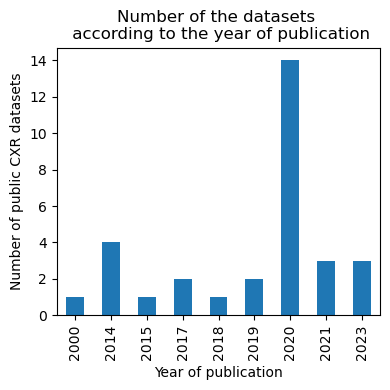

In [70]:
#plot a bar plot with number of publications:
fig = year_df.plot.bar(x="Year of publication", y="Name", style=".-", legend=False, figsize=(4,4))
#years =['2000','2014','2015','2017','2018','2019','2020','2021','2022','2023']
fig.set(xticks=([0,1,2,3,4,5,6,7,8]))
fig.set_xticklabels(labels = ['2000','2014','2015','2017','2018','2019','2020','2021','2023'])
fig.set_title('Number of the datasets \n according to the year of publication')
fig.set_ylabel('Number of public CXR datasets')
plt.tight_layout()
plt.savefig('Num_dataset_year_pub.png')

## Diseases/abnormalities:

In [71]:
#examine diseases
df['Diseases included']

1     Covid-19, increased density, pneumonia, unchan...
4                                                    NR
5                                Covid-19, non-covid-19
6     Atelectasis, Infiltration, Effusion, Cardiomeg...
8     Atelectasis, Infiltration, Pneumothorax, Effus...
9     No Finding Enlarged Cardiom. Cardiomegaly Lung...
10                               Covid-19, non-covid-19
11                                             Covid-19
12                                             Covid-19
13                                             Covid-19
14                                             Covid-19
15    COVID-19 (SARSr-CoV-2), SARS (SARSr-CoV-1), ME...
16                                             Covid-19
17                                             Covid-19
18                                             Covid-19
19                                             Covid-19
20                                             Covid-19
21    no pneumonia/non-COVID-19, pneumonia/COVID

In [72]:
#convert all string to lowercase:
df['Diseases included']=df['Diseases included'].str.lower()

/var/folders/pc/4yxzlm711hn0wmvrdybd88y80000gn/T/ipykernel_33564/1281284640.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [73]:
#convert diseases column to list
diseases = df["Diseases included"].values.tolist()

In [74]:
#split by comma:
diseases_df = []
for disease in diseases:
    diseases_df.extend(disease.split(","))

In [75]:
for disease in diseases_df:
    disease.rstrip()
    print(disease)

covid-19
 increased density
 pneumonia
 unchanged
 consolidation
 infiltrates
 interstitial pattern
 alveolar pattern
 normal
 ground glass pattern
 cardiomegaly
 pleuraæ effusion
 laminar atelectasis
 costophrenic angle blunting
 suboptimal study
 viral pneunomia
 endotracheal tube
 aortic elongation
 nodule
 central venous catheter*
nr
covid-19
 non-covid-19
atelectasis
 infiltration
 effusion
 cardiomegaly
 fibrosis
atelectasis
 infiltration
 pneumothorax
 effusion
 pneumonia
 cardiomegaly
 nodule mass
 consolidation
 edema
 emphysema
 fibrosis
 pleural thickening and hernia
no finding enlarged cardiom. cardiomegaly lung lesion
 lung opacity edema consolidation pneumonia atelectasis pneumothorax pleural effusion pleural other fracture
 support devices
covid-19
 non-covid-19
covid-19
covid-19
covid-19
covid-19
covid-19 (sarsr-cov-2)
 sars (sarsr-cov-1)
 mers-cov
 varicella
 influenza
 herpes
 streptococcus spp.
 klebsiella spp.
 escherichia coli
 nocardia spp.
 mycoplasma spp.
 legio

In [76]:
diseases_df = pd.DataFrame(diseases_df, columns=['Diseases'])

In [77]:
diseases_df

,Diseases
0,covid-19
1,increased density
2,pneumonia
3,unchanged
4,consolidation
...,...
280,arteriovenous malformations
281,lymph node enlargement) and chest changes (at...
282,malformations
283,agenesis


In [78]:
#remove spaces on left and right sides of the strings:
diseases_df['Diseases'] = diseases_df['Diseases'].apply(str.strip)

In [79]:
diseases_df['count']=1

In [80]:
diseases_df

,Diseases,count
0,covid-19,1
1,increased density,1
2,pneumonia,1
3,unchanged,1
4,consolidation,1
...,...,...
280,arteriovenous malformations,1
281,lymph node enlargement) and chest changes (ate...,1
282,malformations,1
283,agenesis,1


In [81]:
#group by diseases and count appearences:
count_diseases = diseases_df.groupby('Diseases').count().reset_index()

In [82]:
#sort by count of diseases - descending:
count_diseases = count_diseases.sort_values("count", ascending=False)

In [83]:
#show top 15:
count_diseases.head(n=15)

,Diseases,count
52,covid-19,15
143,normal,9
37,cardiomegaly,5
163,pneumonia,4
208,tuberculosis,3
18,atelectasis,3
137,nodule,3
49,consolidation,3
83,ground glass pattern,2
51,costophrenic angle blunting,2


In [84]:
df['Diseases included']

1     covid-19, increased density, pneumonia, unchan...
4                                                    nr
5                                covid-19, non-covid-19
6     atelectasis, infiltration, effusion, cardiomeg...
8     atelectasis, infiltration, pneumothorax, effus...
9     no finding enlarged cardiom. cardiomegaly lung...
10                               covid-19, non-covid-19
11                                             covid-19
12                                             covid-19
13                                             covid-19
14                                             covid-19
15    covid-19 (sarsr-cov-2), sars (sarsr-cov-1), me...
16                                             covid-19
17                                             covid-19
18                                             covid-19
19                                             covid-19
20                                             covid-19
21    no pneumonia/non-covid-19, pneumonia/covid

In [85]:
#count number of publications that contains covid-19:
covid19 = 0
for i in df['Diseases included']:
    if "covid-19" in i:
        covid19+=1

print(covid19)

17


In [86]:
#add rows with diseases column:
s= 'covid-19'
df['covid19'] = df['Diseases included'].apply(lambda x: any(s in x for i in df))

/var/folders/pc/4yxzlm711hn0wmvrdybd88y80000gn/T/ipykernel_33564/4103109543.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [87]:
df

,Name,Access type,Access details,Link,Citatation,Country of origin,Year of publication,Version,"Last updated, year",Acquires from other dataset:,...,View position,Labels,Diseases included,Patient age,Patient gender,Ratio sex (f/m/na),Patient race/ethnicity,Comments,Also cite:,covid19
1,BIMCV-COVID19+,Open access,"Create google account, submission of personal ...",https://bimcv.cipf.es/bimcv-projects/bimcv-cov...,"Vayá, M. D. L. I., Saborit, J. M., Montell, J....",Spain,2020,3,2023,Padchest,...,"frontal,lateral",NR,"covid-19, increased density, pneumonia, unchan...",44824,44824,45.9/54.1,0.0,NaN,NaN,True
4,Chest x-ray disease images,Open access,Create Kaggle account to download zip-file,https://www.kaggle.com/datasets/parsagouran/ch...,NR,NR,2023,NR,2023,NR,...,NR,NR,nr,0,0,0,0.0,NaN,NaN,False
5,Chest X-Rays - Covid19 Pakistan,Open access,Downloadable zip-file,https://data.mendeley.com/datasets/fvp7m8c9ss,"Malik, Hassaan (2020), “Chest X-rays of COVID-...",Pakistan,2020,1,2020,NR,...,Frontal,2,"covid-19, non-covid-19",0,0,0,0.0,NaN,NaN,True
6,Chest X-Rays Dataset,Open access,Create Kaggle account to download zip-file,https://datasetsearch.research.google.com/sear...,NR,NR,2018,NR,2018,NR,...,NR,5,"atelectasis, infiltration, effusion, cardiomeg...",0,0,0,0.0,NaN,NaN,False
8,ChestX-ray14,Open access,Link to data,https://nihcc.app.box.com/v/ChestXray-NIHCC,"Wang, Xiaosong & Peng, Yifan & Lu, Le & Lu, Zh...",USA,2017,NR,2020,ChestX-ray8,...,"AP, PA",14,"atelectasis, infiltration, pneumothorax, effus...",112120,112120,43.5/56.5,0.0,NaN,NaN,False
9,CheXpert,Open access,Create Standford AIMI account and download zip...,https://stanfordmlgroup.github.io/competitions...,"Irvin, Jeremy, et al. ""Chexpert: A large chest...",USA,2019,1.0,2019,NR,...,"Frontal,lateral",14,no finding enlarged cardiom. cardiomegaly lung...,223414,223414,40.6/59.4,0.0,NaN,NaN,False
10,COVID 19 Xray Image Dataset with Huge Samples,Open access,Create Kaggle account to download zip-file,https://www.kaggle.com/datasets/mr3suvhro/covi...,NR,NR,2020,NR,2020,NR,...,NR,NR,"covid-19, non-covid-19",0,0,NaN,0.0,NaN,NaN,True
11,COVID-19 AND NORMAL CHEST X-RAY,Open access,Create IEEE port account and download zip-file,https://ieee-dataport.org/open-access/covid-19...,"Happy Monday, May 23, 2021, ""COVID-19 AND Norm...",China,2021,NR,2021,NR,...,NR,NR,covid-19,0,0,NaN,0.0,NaN,NaN,True
12,Covid-19 chest x-ray detection dataset,Open access,Create Kaggle account to download zip-file,https://www.kaggle.com/datasets/rahulmakwana/c...,NR,NR,2020,1,2020,NR,...,NR,NR,covid-19,0,0,NaN,0.0,NaN,NaN,True
13,COVID-19 Chest X-Ray Image Repository,Open access,Create Kaggle account to download zip-file,https://www.kaggle.com/datasets/mdzabirulislam...,NR,NR,2020,1,2020,NR,...,NR,NR,covid-19,0,0,NaN,0.0,NaN,NaN,True


In [88]:
#group by year and covid-19:
covid_byyear = df.groupby(['Year of publication','covid19', ])[['Name']].count().reset_index()

In [89]:
covid_byyear

,Year of publication,covid19,Name
0,2000,False,1
1,2014,False,4
2,2015,False,1
3,2017,False,2
4,2018,False,1
5,2019,False,2
6,2020,False,1
7,2020,True,13
8,2021,True,3
9,2023,False,2


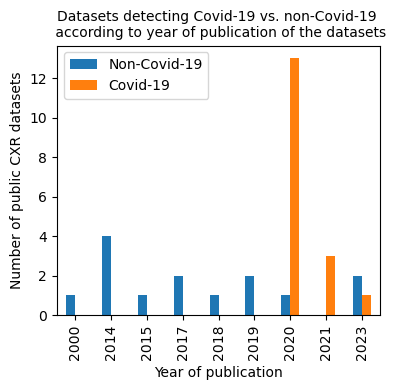

In [103]:
# plot number of covid-19 dataset vs. non-covid-19 spread on years of publication
fig, ax = plt.subplots(figsize=(4,4))
# use unstack()
df.groupby(['Year of publication','covid19'])[['Name']].count().unstack().plot.bar(ax=ax)
ax.set_title('Datasets detecting Covid-19 vs. non-Covid-19 \n according to year of publication of the datasets', fontdict={'fontsize':10})

ax.set_ylabel('Number of public CXR datasets')
ax.legend(['Non-Covid-19', 'Covid-19'])
plt.tight_layout()
plt.savefig('num_covid_noncovid.png')

## Number of images:

In [104]:
df["Number of images"]

1      56171
4        572
5        527
6        910
8     112120
9     224316
10      2328
11       326
12       200
13       747
14       368
15       866
16       243
17       200
18       144
19     13638
20       852
21     30386
22       537
23        50
24      5232
25      8121
26       247
27      8105
28       138
34    160861
36       662
39       156
40       150
41     11200
43      6743
Name: Number of images, dtype: object

In [105]:
#Convert number of images to integer:
df["Number of images"] = df["Number of images"].astype(int)

/var/folders/pc/4yxzlm711hn0wmvrdybd88y80000gn/T/ipykernel_33564/1542138444.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [106]:
#Calculate total number of images:
df["Number of images"].sum()

647116

In [107]:
#copy dataframe:
image_df = oa_df.copy()

In [108]:
#remove not reported (NR) (missing)
df_image= image_df[image_df["Number of images"]!="NR"]

In [109]:
df_image['Number of images']

1      56171
4        572
5        527
6        910
8     112120
9     224316
10      2328
11       326
12       200
13       747
14       368
15       866
16       243
17       200
18       144
19     13638
20       852
21     30386
22       537
23        50
24      5232
25      8121
26       247
27      8105
28       138
34    160861
36       662
39       156
40       150
41     11200
43      6743
Name: Number of images, dtype: object

In [110]:
df_image['Number of images'].count()

31

In [111]:
#convert to number of images to int:
df_image = df_image.astype({'Number of images':'str','Number of images':'int' })

In [112]:
df_image.describe()

,Number of images,Patient race/ethnicity
count,31.000000,31.0
mean,20874.709677,0.0
std,51594.902113,0.0
min,50.000000,0.0
25%,245.000000,0.0
50%,747.000000,0.0
75%,8113.000000,0.0
max,224316.000000,0.0


In [113]:
#group by year of publication:
images_year = df_image.groupby(["Year of publication"])['Number of images'].sum().reset_index()

In [114]:
images_year

,Year of publication,Number of images
0,2000,247
1,2014,1106
2,2015,8121
3,2017,117352
4,2018,910
5,2019,385177
6,2020,104451
7,2021,14332
8,2023,15420


In [115]:
#Cumulative images:
images_year['Cumulative number of images']=images_year['Number of images'].cumsum()

In [116]:
images_year

,Year of publication,Number of images,Cumulative number of images
0,2000,247,247
1,2014,1106,1353
2,2015,8121,9474
3,2017,117352,126826
4,2018,910,127736
5,2019,385177,512913
6,2020,104451,617364
7,2021,14332,631696
8,2023,15420,647116


## Number of patients:

In [117]:
df["Number of unique patients"]

1     24942
4        NR
5        75
6        NR
8     30805
9     65240
10       NR
11       NR
12       NR
13       NR
14      368
15      449
16       71
17       NR
18       NR
19     1365
20       NR
21    17026
22       NR
23       NR
24       NR
25     3996
26       NR
27       NR
28       NR
34    67625
36       NR
39       NR
40       NR
41       NR
43       NR
Name: Number of unique patients, dtype: object

In [118]:
df["Number of unique patients"].count()

31

In [119]:
#copy df:
patients_df = df.copy()

In [120]:
#remove not reported (NR) (missing)
patients_df= patients_df[patients_df["Number of unique patients"]!="NR"]


In [121]:
patients_df["Number of unique patients"]

1     24942
5        75
8     30805
9     65240
14      368
15      449
16       71
19     1365
21    17026
25     3996
34    67625
Name: Number of unique patients, dtype: object

In [122]:
patients_df["Number of unique patients"].count()

11

In [123]:
#convert to number of patients to int:
patients_df = patients_df.astype({'Number of unique patients':'str','Number of unique patients':'int' })

In [124]:
#Count total number of patients being recorded:
patients_df["Number of unique patients"].sum()

211962

In [125]:
#group by year of publication and number of unique patients:
patients_year = patients_df.groupby(["Year of publication"])['Number of unique patients'].sum().reset_index()

In [126]:
patients_year

,Year of publication,Number of unique patients
0,2015,3996
1,2017,30805
2,2019,132865
3,2020,42563
4,2021,1733


In [127]:
#cumulative patients year:
patients_year['Cumulative number of patients']=patients_year['Number of unique patients'].cumsum()

In [128]:
patients_year

,Year of publication,Number of unique patients,Cumulative number of patients
0,2015,3996,3996
1,2017,30805,34801
2,2019,132865,167666
3,2020,42563,210229
4,2021,1733,211962


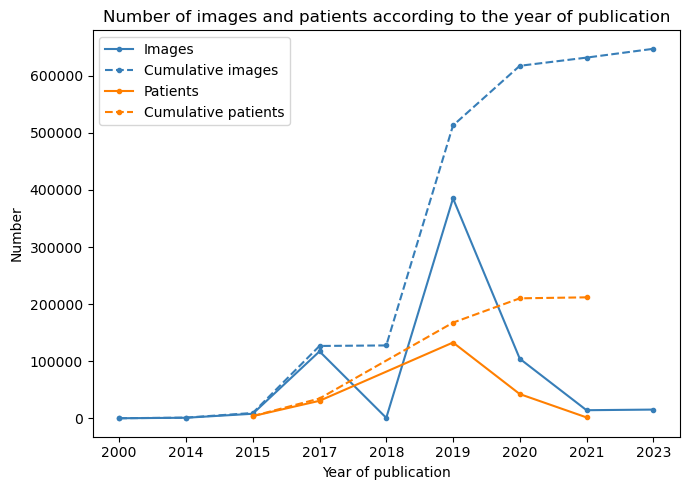

In [129]:
#plot the number of images for each year of publication and cummulative
fig, ax = plt.subplots(figsize=(7,5))

ax.plot(images_year['Year of publication'], images_year['Number of images'], color='#377eb8', marker='.')
ax.plot(images_year['Year of publication'], images_year['Cumulative number of images'], color='#377eb8', linestyle='--', marker='.')
ax.plot(patients_year['Year of publication'], patients_year['Number of unique patients'], color='#ff7f00', marker='.')
ax.plot(patients_year['Year of publication'], patients_year['Cumulative number of patients'], color='#ff7f00', linestyle='--', marker='.')
ax.legend(['Images', 'Cumulative images', 'Patients', 'Cumulative patients'])
ax.set_title("Number of images and patients according to the year of publication")
ax.set_ylabel('Number')
ax.set_xlabel('Year of publication')
plt.tight_layout()
plt.savefig('num_images_patients.png')

In [130]:
#Check which datasets are released in 2019
df[["Year of publication", "Name"]].sort_values("Year of publication")

,Year of publication,Name
26,2000,JRST
28,2014,MC
40,2014,TBX - Dataset B
39,2014,TBX - Dataset A
36,2014,SH
25,2015,Indiana
8,2017,ChestX-ray14
24,2017,India
6,2018,Chest X-Rays Dataset
9,2019,CheXpert


## Number of images geographical distribution:

In [131]:
#make as df with number of images and country of origin:
images_geo = df[["Number of images", "Country of origin"]]

In [132]:
#count number of datasets:
images_geo.count()

Number of images     31
Country of origin    31
dtype: int64

In [133]:
#remove countries with no country of origin:
images_geo = images_geo[images_geo['Country of origin']!='NR']

In [134]:
#count number of datasets AFTER removal of not reported:
images_geo.count()

Number of images     20
Country of origin    20
dtype: int64

In [135]:
images_geo

,Number of images,Country of origin
1,56171,Spain
5,527,Pakistan
8,112120,USA
9,224316,USA
11,326,China
14,368,Jordan
15,866,"Afghanistan,Argentina,Australia,Austria,Belgiu..."
16,243,Germany
19,13638,USA
20,852,Spain


In [136]:
#remove countries with several countries of origin as we do not know which pictures are from which countries:
images_geo = images_geo[images_geo['Country of origin']!='Multiple']
images_geo = images_geo[images_geo['Country of origin']!='Japan, USA']

In [137]:
images_geo

,Number of images,Country of origin
1,56171,Spain
5,527,Pakistan
8,112120,USA
9,224316,USA
11,326,China
14,368,Jordan
15,866,"Afghanistan,Argentina,Australia,Austria,Belgiu..."
16,243,Germany
19,13638,USA
20,852,Spain


In [138]:
#remove index_15
images_geo = images_geo[images_geo.index!=15]

In [139]:
#read number of images from multiple countries index 15:
index_15 = pd.read_csv('../Analysis/Covid19_data_collection_images_countries.csv')

In [140]:
#drop unnamed column:
index_15 = index_15.drop(columns=['Unnamed: 0'])

In [141]:
index_15

,country,patientid
0,afghanistan,1.0
1,argentina,1.0
2,australia,84.0
3,NaN,NaN
4,NaN,NaN
...,...,...
56,NaN,NaN
57,NaN,NaN
58,NaN,NaN
59,united states,40.0


In [142]:
#drop missing val
index_15 = index_15.dropna()

In [143]:
index_15

,country,patientid
0,afghanistan,1.0
1,argentina,1.0
2,australia,84.0
5,austria,6.0
7,belgium,2.0
9,brazil,2.0
10,canada,15.0
11,china,42.0
13,colombia,1.0
14,denmark,2.0


In [144]:
#rename columns:
index_15=index_15.rename(columns={'country': 'Country of origin', 'patientid': 'Number of images'})

In [145]:
index_15

,Country of origin,Number of images
0,afghanistan,1.0
1,argentina,1.0
2,australia,84.0
5,austria,6.0
7,belgium,2.0
9,brazil,2.0
10,canada,15.0
11,china,42.0
13,colombia,1.0
14,denmark,2.0


In [146]:
#concat geo_images with the extracted index 15 :
images_geo = pd.concat([images_geo,index_15], ignore_index=True)

In [147]:
images_geo 

,Number of images,Country of origin
0,56171.0,Spain
1,527.0,Pakistan
2,112120.0,USA
3,224316.0,USA
4,326.0,China
5,368.0,Jordan
6,243.0,Germany
7,13638.0,USA
8,852.0,Spain
9,5232.0,China


In [148]:
#rename USA to unisted states:
images_geo['Country of origin']= images_geo['Country of origin'].replace({'USA': 'united states'})

In [149]:
#country name to lower:
images_geo['Country of origin']=images_geo['Country of origin']. apply(str.lower)

In [150]:
#group by country and show number of images:
images_geo = images_geo.groupby('Country of origin')[['Number of images']].sum().reset_index()

In [151]:
images_geo

,Country of origin,Number of images
0,afghanistan,1.0
1,argentina,1.0
2,australia,84.0
3,austria,6.0
4,belgium,2.0
5,brazil,2.0
6,canada,15.0
7,china,17462.0
8,colombia,1.0
9,denmark,2.0


In [152]:
#rename column to country such that it can be merged with gapminder (the df containing info on countries)
images_geo=images_geo.rename(columns={'Country of origin':'country'})

In [153]:
#add country names to lower string:
gapminder['country']=gapminder['country']. apply(str.lower)

In [154]:
#merge data with gapminder:
df_images_geo=pd.merge(gapminder, images_geo, how='left', on='country')

In [155]:
df_images_geo

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num,Number of images
0,afghanistan,Asia,2007,43.828,31889923,974.580338,AFG,4,1.0
1,albania,Europe,2007,76.423,3600523,5937.029526,ALB,8,NaN
2,algeria,Africa,2007,72.301,33333216,6223.367465,DZA,12,NaN
3,angola,Africa,2007,42.731,12420476,4797.231267,AGO,24,NaN
4,argentina,Americas,2007,75.320,40301927,12779.379640,ARG,32,1.0
...,...,...,...,...,...,...,...,...,...
137,vietnam,Asia,2007,74.249,85262356,2441.576404,VNM,704,6.0
138,west bank and gaza,Asia,2007,73.422,4018332,3025.349798,PSE,275,NaN
139,"yemen, rep.",Asia,2007,62.698,22211743,2280.769906,YEM,887,NaN
140,zambia,Africa,2007,42.384,11746035,1271.211593,ZMB,894,NaN


In [524]:
#plot geographical spread of origin of dataset and CXR images:
fig2 = px.choropleth(df_images_geo, locations="iso_alpha", width=900, height=600,
                    color="Number of images", 
                    hover_name="country", # column to add to hover information
                    color_continuous_scale=px.colors.sequential.Plasma
                   )
fig2.update_layout(title={
        'text': "Geographical origin and global distribution of CXR images",
        'y':0.85,
        'x':0.45,
        'font_color': 'black',
        'font_size':14,
        'xanchor': 'center',
        'yanchor': 'top'})
fig2.update_layout(font_color='black', height=400, width=700)
fig2.write_image("images/geo_images.png")
fig2.show()

## Diseases/abnormalities

In [160]:
df['Diseases included']

1     covid-19, increased density, pneumonia, unchan...
4                                                    nr
5                                covid-19, non-covid-19
6     atelectasis, infiltration, effusion, cardiomeg...
8     atelectasis, infiltration, pneumothorax, effus...
9     no finding enlarged cardiom. cardiomegaly lung...
10                               covid-19, non-covid-19
11                                             covid-19
12                                             covid-19
13                                             covid-19
14                                             covid-19
15    covid-19 (sarsr-cov-2), sars (sarsr-cov-1), me...
16                                             covid-19
17                                             covid-19
18                                             covid-19
19                                             covid-19
20                                             covid-19
21    no pneumonia/non-covid-19, pneumonia/covid

In [161]:
#convert all string to lower:
df['Diseases included'] = df['Diseases included'].apply(str. lower)

/var/folders/pc/4yxzlm711hn0wmvrdybd88y80000gn/T/ipykernel_33564/2883104796.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [162]:
#check how many dataset do not state abnormalities or diseases to be detected:
s= 'nr'
df['nr'] = df['Diseases included'].apply(lambda x: any(s in x for i in df))

/var/folders/pc/4yxzlm711hn0wmvrdybd88y80000gn/T/ipykernel_33564/3208949550.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [163]:
#count number of datasets not reporting:
nr_df = df.groupby('nr')[['Name']].count().reset_index()

In [164]:
nr_df

,nr,Name
0,False,30
1,True,1


In [165]:
#add rows with tuberculosis diseases column:
#strings to check for:
strings= ['tuberculocis','tb', 'ptb']
df['tuberculocis'] = df['Diseases included'].apply(lambda x: any(s in x for s in strings for i in df))

/var/folders/pc/4yxzlm711hn0wmvrdybd88y80000gn/T/ipykernel_33564/3028194232.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [166]:
df['tuberculocis']

1     False
4     False
5     False
6     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24    False
25    False
26    False
27    False
28     True
34    False
36     True
39     True
40     True
41     True
43    False
Name: tuberculocis, dtype: bool

In [167]:
#count number of datasets with covid-19
tub_byyear = df.groupby(['tuberculocis'])[['Name']].count().reset_index()

In [168]:
tub_byyear

,tuberculocis,Name
0,False,26
1,True,5


In [169]:
#add column with pneunomia diseases column:
s= 'pneumonia'
df['pneumonia'] = df['Diseases included'].apply(lambda x: any(s in x for i in df))

/var/folders/pc/4yxzlm711hn0wmvrdybd88y80000gn/T/ipykernel_33564/928299423.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [170]:
df['pneumonia'] 

1      True
4     False
5     False
6     False
8      True
9      True
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21     True
22     True
23    False
24     True
25    False
26    False
27     True
28    False
34     True
36    False
39    False
40    False
41    False
43     True
Name: pneumonia, dtype: bool

In [171]:
#count number of datasets with pneu:
pneu_byyear = df.groupby(['pneumonia'])[['Name']].count().reset_index()

In [172]:
pneu_byyear

,pneumonia,Name
0,False,22
1,True,9


In [173]:
#add rows with cardiomegaly disease column:
s = 'cardiomegaly'
df['cardiomegaly'] = df['Diseases included'].apply(lambda x: any(s in x for i in df))

/var/folders/pc/4yxzlm711hn0wmvrdybd88y80000gn/T/ipykernel_33564/2951249704.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [174]:
#count number of datasets with cardiomegaly :
cardi_byyear = df.groupby(['cardiomegaly'])[['Name']].count().reset_index()

In [175]:
cardi_byyear

,cardiomegaly,Name
0,False,25
1,True,6


In [176]:
#add rows with atelectasis disease column:
s = 'atelectasis'
df['atelectasis'] = df['Diseases included'].apply(lambda x: any(s in x for i in df))

/var/folders/pc/4yxzlm711hn0wmvrdybd88y80000gn/T/ipykernel_33564/5483481.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [177]:
#count number of datasets with atelectasis :
atelec_byyear = df.groupby(['atelectasis'])[['Name']].count().reset_index()

In [178]:
atelec_byyear

,atelectasis,Name
0,False,24
1,True,7


In [179]:
#add rows with effusion disease column:
s = 'effusion'
df['effusion']=df['Diseases included'].apply(lambda x: any(s in x for i in df))

/var/folders/pc/4yxzlm711hn0wmvrdybd88y80000gn/T/ipykernel_33564/1387557655.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [180]:
#count number of datasets with effusion:
effu_byyear = df.groupby(['effusion'])[['Name']].count().reset_index()

In [181]:
effu_byyear

,effusion,Name
0,False,24
1,True,7


In [182]:
##add rows with fibrosis disease column:
s ='fibrosis'
df['fibrosis']=df['Diseases included'].apply(lambda x: any(s in x for i in df))

/var/folders/pc/4yxzlm711hn0wmvrdybd88y80000gn/T/ipykernel_33564/1983283385.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [183]:
#count number of datasets with fibrosis:
fibro_byyear = df.groupby(['fibrosis'])[['Name']].count().reset_index()

In [184]:
fibro_byyear

,fibrosis,Name
0,False,27
1,True,4


In [185]:
##add rows with nodule disease column:
s = 'nodule'
df['nodule']=df['Diseases included'].apply(lambda x: any(s in x for i in df))

/var/folders/pc/4yxzlm711hn0wmvrdybd88y80000gn/T/ipykernel_33564/3701020696.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [186]:
#count number of datasets with nodule:
nodule_byyear = df.groupby(['nodule'])[['Name']].count().reset_index()

In [187]:
nodule_byyear 

,nodule,Name
0,False,26
1,True,5


In [188]:
##add rows with edema disease column:
s ='edema'
df['edema']=df['Diseases included'].apply(lambda x: any(s in x for i in df))

/var/folders/pc/4yxzlm711hn0wmvrdybd88y80000gn/T/ipykernel_33564/3605397601.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [189]:
#count number of datasets with edema:
edema_byyear = df.groupby(['edema'])[['Name']].count().reset_index()

In [190]:
edema_byyear

,edema,Name
0,False,28
1,True,3


In [191]:
##add rows with emphysema disease column:
s='emphysema'
df['emphysema']=df['Diseases included'].apply(lambda x: any(s in x for i in df))

/var/folders/pc/4yxzlm711hn0wmvrdybd88y80000gn/T/ipykernel_33564/491424747.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [192]:
#count number of datasets with edema:
emphysema_byyear = df.groupby(['emphysema'])[['Name']].count().reset_index()

In [193]:
emphysema_byyear

,emphysema,Name
0,False,28
1,True,3


In [194]:
##add rows with covid-19 disease column:
s='covid-19'
df['covid-19'] = df['Diseases included'].apply(lambda x: any(s in x for i in df))

/var/folders/pc/4yxzlm711hn0wmvrdybd88y80000gn/T/ipykernel_33564/2252085165.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [195]:
#count number of datasets with covid-19:
covid19_df = df.groupby(['covid-19'])[['Name']].count().reset_index()

In [196]:
covid19_df

,covid-19,Name
0,False,14
1,True,17


In [197]:
##add rows with consolidation disease column:
s='consolidation'
df['consolidation'] = df['Diseases included'].apply(lambda x: any(s in x for i in df))

/var/folders/pc/4yxzlm711hn0wmvrdybd88y80000gn/T/ipykernel_33564/1442148105.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [198]:
#count number of datasets with consolidation:
consul_df = df.groupby(['consolidation'])[['Name']].count().reset_index()

In [199]:
consul_df

,consolidation,Name
0,False,26
1,True,5


In [200]:
#add rows with fracture diseases column:
#strings to check for:
s= ['fracture','fraction']
df['fracture'] = df['Diseases included'].apply(lambda x: any(s in x for s in strings for i in df))

/var/folders/pc/4yxzlm711hn0wmvrdybd88y80000gn/T/ipykernel_33564/595865236.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [201]:
#count number of datasets with fractures:
fracture_df = df.groupby(['fracture'])[['Name']].count().reset_index()

In [202]:
fracture_df

,fracture,Name
0,False,26
1,True,5


In [203]:
##add rows with lung opacity disease column:
s='granuloma'
df['granuloma'] = df['Diseases included'].apply(lambda x: any(s in x for i in df))

/var/folders/pc/4yxzlm711hn0wmvrdybd88y80000gn/T/ipykernel_33564/425485100.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [204]:
#count number of datasets with granuloma:
granuloma_df = df.groupby(['granuloma'])[['Name']].count().reset_index()

In [205]:
granuloma_df

,granuloma,Name
0,False,29
1,True,2


In [206]:
##add rows with endotracheal tube column:
s='endotracheal tube'
df['endotracheal tube']=df['Diseases included'].apply(lambda x: any(s in x for i in df))

/var/folders/pc/4yxzlm711hn0wmvrdybd88y80000gn/T/ipykernel_33564/615528339.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [207]:
#count number of datasets with endotracheal tube:
endotracheal_tube_df = df.groupby(['endotracheal tube'])[['Name']].count().reset_index()

In [208]:
endotracheal_tube_df

,endotracheal tube,Name
0,False,29
1,True,2


In [209]:
##add rows with hernia column:
s='hernia'
df['hernia']=df['Diseases included'].apply(lambda x: any(s in x for i in df))

/var/folders/pc/4yxzlm711hn0wmvrdybd88y80000gn/T/ipykernel_33564/2770927118.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [210]:
#count number of datasets with hernia:
hernia_df = df.groupby(['hernia'])[['Name']].count().reset_index()

In [211]:
##add rows with pneumothorax column:
s='pneumothorax'
df['pneumothorax']=df['Diseases included'].apply(lambda x: any(s in x for i in df))

/var/folders/pc/4yxzlm711hn0wmvrdybd88y80000gn/T/ipykernel_33564/1832594200.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [212]:
#count number of datasets with pneumothorax:
pneumothorax_df = df.groupby(['pneumothorax'])[['Name']].count().reset_index()

In [213]:
pneumothorax_df

,pneumothorax,Name
0,False,28
1,True,3


In [214]:
##add rows with catheter column:
s='catheter'
df['catheter']=df['Diseases included'].apply(lambda x: any(s in x for i in df))

/var/folders/pc/4yxzlm711hn0wmvrdybd88y80000gn/T/ipykernel_33564/3934747220.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [215]:
#count number of datasets with catheter:
catheter_df = df.groupby(['catheter'])[['Name']].count().reset_index()

In [216]:
catheter_df

,catheter,Name
0,False,29
1,True,2


In [217]:
##add rows with aortic elongation column:
s='aortic elongation'
df['aortic elongation']=df['Diseases included'].apply(lambda x: any(s in x for i in df))

/var/folders/pc/4yxzlm711hn0wmvrdybd88y80000gn/T/ipykernel_33564/840331675.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [218]:
#count number of datasets with aortic elongation:
aortic_elongation_df = df.groupby(['aortic elongation'])[['Name']].count().reset_index()

In [219]:
aortic_elongation_df

,aortic elongation,Name
0,False,29
1,True,2


In [220]:
##add rows with empyema column:
s='empyema'
df['empyema']=df['Diseases included'].apply(lambda x: any(s in x for i in df))

/var/folders/pc/4yxzlm711hn0wmvrdybd88y80000gn/T/ipykernel_33564/1724479573.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [221]:
#count number of datasets with aortic elongation:
empyema_df = df.groupby(['empyema'])[['Name']].count().reset_index()

In [222]:
empyema_df

,empyema,Name
0,False,29
1,True,2


In [223]:
##add rows with infiltration column:
s=['infiltration', 'infiltrates']
df['infiltration']=df['Diseases included'].apply(lambda x: any(s in x for s in strings for i in df))

/var/folders/pc/4yxzlm711hn0wmvrdybd88y80000gn/T/ipykernel_33564/512067864.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [224]:
#count number of datasets with aortic elongation:
infiltration_df = df.groupby(['infiltration'])[['Name']].count().reset_index()

In [225]:
infiltration_df

,infiltration,Name
0,False,26
1,True,5


In [226]:
##add rows with alveolar column:
s='alveolar'
df['alveolar']=df['Diseases included'].apply(lambda x: any(s in x for i in df))


/var/folders/pc/4yxzlm711hn0wmvrdybd88y80000gn/T/ipykernel_33564/3679773210.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [227]:
#count number of datasets with alveolar elongation:
alveolar_df = df.groupby(['alveolar'])[['Name']].count().reset_index()

In [228]:
alveolar_df

,alveolar,Name
0,False,29
1,True,2


In [229]:
##add rows with costophrenic angle blunting column:
s='costophrenic angle blunting'
df['costophrenic angle blunting']=df['Diseases included'].apply(lambda x: any(s in x for i in df))


/var/folders/pc/4yxzlm711hn0wmvrdybd88y80000gn/T/ipykernel_33564/940903724.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [230]:
#count number of datasets with costophrenic angle blunting:
costophrenic_angle_blunting_df = df.groupby(['costophrenic angle blunting'])[['Name']].count().reset_index()

In [231]:
costophrenic_angle_blunting_df 

,costophrenic angle blunting,Name
0,False,29
1,True,2


In [232]:
#create a data frame with the diseases being detected most often:
diseases_df = df[['alveolar','aortic elongation','atelectasis','cardiomegaly', 'catheter','consolidation',
                  'costophrenic angle blunting','covid-19','edema', 'effusion', 'emphysema', 'empyema',
                  'endotracheal tube','fibrosis','fracture','granuloma','hernia','infiltration','nodule',
                  'pneumonia','pneumothorax','tuberculocis'
                  ]]

In [233]:
diseases_df

,alveolar,aortic elongation,atelectasis,cardiomegaly,catheter,consolidation,costophrenic angle blunting,covid-19,edema,effusion,...,endotracheal tube,fibrosis,fracture,granuloma,hernia,infiltration,nodule,pneumonia,pneumothorax,tuberculocis
1,True,True,True,True,True,True,True,True,False,True,...,True,False,False,False,False,False,True,True,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
6,False,False,True,True,False,False,False,False,False,True,...,False,True,False,False,False,False,False,False,False,False
8,False,False,True,True,False,True,False,False,True,True,...,False,True,False,False,True,False,True,True,True,False
9,False,False,True,True,False,True,False,False,True,True,...,False,False,False,False,False,False,False,True,True,False
10,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
11,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
12,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
13,False,False,False,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False


In [234]:
#convert true/false to dummies (1/0)
df_diseases_asint = diseases_df.astype(int)

In [235]:
df_diseases_asint

,alveolar,aortic elongation,atelectasis,cardiomegaly,catheter,consolidation,costophrenic angle blunting,covid-19,edema,effusion,...,endotracheal tube,fibrosis,fracture,granuloma,hernia,infiltration,nodule,pneumonia,pneumothorax,tuberculocis
1,1,1,1,1,1,1,1,1,0,1,...,1,0,0,0,0,0,1,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
8,0,0,1,1,0,1,0,0,1,1,...,0,1,0,0,1,0,1,1,1,0
9,0,0,1,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,1,1,0
10,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [236]:
df_diseases_asint[['pneumonia','atelectasis','cardiomegaly', 'effusion', 'consolidation']]

,pneumonia,atelectasis,cardiomegaly,effusion,consolidation
1,1,1,1,1,1
4,0,0,0,0,0
5,0,0,0,0,0
6,0,1,1,1,0
8,1,1,1,1,1
9,1,1,1,1,1
10,0,0,0,0,0
11,0,0,0,0,0
12,0,0,0,0,0
13,0,0,0,0,0


In [237]:
#dataset_test= df_diseases_asint.iloc[[3]]

In [238]:
#add a column that sums the number of diseases in each dataset
#df_diseases_asint['Total number of diseases in dataset']=df_diseases_asint.sum(axis=1)

In [239]:
#sort values by sum (ascending order)
#df_diseases_asint =df_diseases_asint.sort_values('Total number of diseases in dataset')

In [240]:
#try to transpose the dataframe for better visualisation:
df_diseases_asint_T = df_diseases_asint.transpose()

In [241]:
#df_diseases_asint_T['Datasets with diseases']=df_diseases_asint_T.sum(axis=1)

In [242]:
#df_diseases_asint_T['Datasets with diseases'] = df_diseases_asint_T['Datasets with diseases'].replace(100,0)

In [243]:
#df_diseases_asint_T

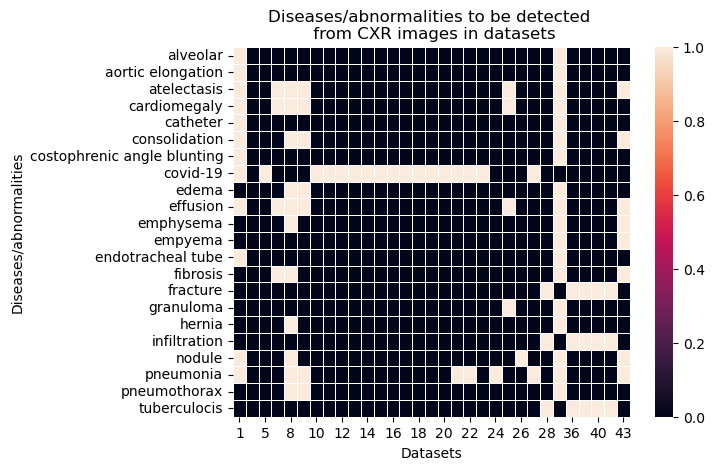

In [246]:
#make a heat map to show how many diseases is included for the different datasets TRANSPOSED:
ax = sns.heatmap(df_diseases_asint_T, linewidth=.5)
ax.set(title="Diseases/abnormalities to be detected \n from CXR images in datasets")
#ax.invert_yaxis()
ax.set_xlabel("Datasets")
ax.set_ylabel("Diseases/abnormalities")
plt.savefig("dataset_diseases_T.png")

In [247]:
#copy dataframe:
df_diseases_one = df_diseases_asint.copy()

In [248]:
df_diseases_one

,alveolar,aortic elongation,atelectasis,cardiomegaly,catheter,consolidation,costophrenic angle blunting,covid-19,edema,effusion,...,endotracheal tube,fibrosis,fracture,granuloma,hernia,infiltration,nodule,pneumonia,pneumothorax,tuberculocis
1,1,1,1,1,1,1,1,1,0,1,...,1,0,0,0,0,0,1,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
8,0,0,1,1,0,1,0,0,1,1,...,0,1,0,0,1,0,1,1,1,0
9,0,0,1,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,1,1,0
10,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [249]:
dataset0 = df_diseases_one.iloc[0]

In [250]:
dataset0

alveolar                       1
aortic elongation              1
atelectasis                    1
cardiomegaly                   1
catheter                       1
consolidation                  1
costophrenic angle blunting    1
covid-19                       1
edema                          0
effusion                       1
emphysema                      0
empyema                        0
endotracheal tube              1
fibrosis                       0
fracture                       0
granuloma                      0
hernia                         0
infiltration                   0
nodule                         1
pneumonia                      1
pneumothorax                   0
tuberculocis                   0
Name: 1, dtype: int64

In [252]:
# create matrix
dataset0_matrix = dataset0.T.dot(dataset0)

In [253]:
dataset0_matrix

12

In [254]:
#count how many datasets only include one disease:
#df_diseases_one['sum']= df_diseases_one.sum(axis=1)

In [255]:
#add index with datasets to column:
#df_diseases_one=df_diseases_one.reset_index()

In [256]:
#df_diseases_one.groupby('sum')[['index']].count().reset_index()

In [257]:
#create co-occurence datafame:
co_occurence_diseases = df_diseases_asint.T.dot(df_diseases_asint)

In [258]:
co_occurence_diseases

,alveolar,aortic elongation,atelectasis,cardiomegaly,catheter,consolidation,costophrenic angle blunting,covid-19,edema,effusion,...,endotracheal tube,fibrosis,fracture,granuloma,hernia,infiltration,nodule,pneumonia,pneumothorax,tuberculocis
alveolar,2,2,2,2,2,2,2,1,1,2,...,2,1,0,1,1,0,2,2,1,0
aortic elongation,2,2,2,2,2,2,2,1,1,2,...,2,1,0,1,1,0,2,2,1,0
atelectasis,2,2,7,6,2,5,2,1,3,7,...,2,4,0,2,2,0,4,5,3,0
cardiomegaly,2,2,6,6,2,4,2,1,3,6,...,2,3,0,2,2,0,3,4,3,0
catheter,2,2,2,2,2,2,2,1,1,2,...,2,1,0,1,1,0,2,2,1,0
consolidation,2,2,5,4,2,5,2,1,3,5,...,2,3,0,1,2,0,4,5,3,0
costophrenic angle blunting,2,2,2,2,2,2,2,1,1,2,...,2,1,0,1,1,0,2,2,1,0
covid-19,1,1,1,1,1,1,1,17,0,1,...,1,0,0,0,0,0,1,4,0,0
edema,1,1,3,3,1,3,1,0,3,3,...,1,2,0,1,2,0,2,3,3,0
effusion,2,2,7,6,2,5,2,1,3,7,...,2,4,0,2,2,0,4,5,3,0


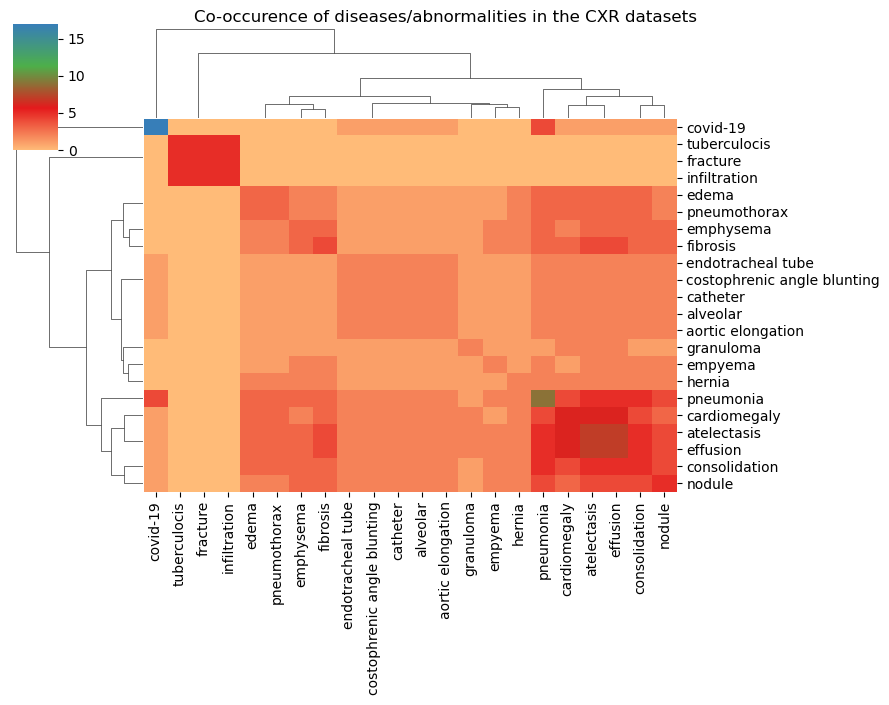

In [259]:
import matplotlib.colors
norm=plt.Normalize(0,17)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#ffbb78","#e41a1c","#4daf4a", "#377eb8"])
c = sns.clustermap(co_occurence_diseases, cmap=cmap, norm=norm, figsize=(9, 7))
c.fig.suptitle('Co-occurence of diseases/abnormalities in the CXR datasets', y=1)
#plt.tight_layout()
plt.savefig("Co-occurence_diseases_clustered")
#rød: "#e41a1c"

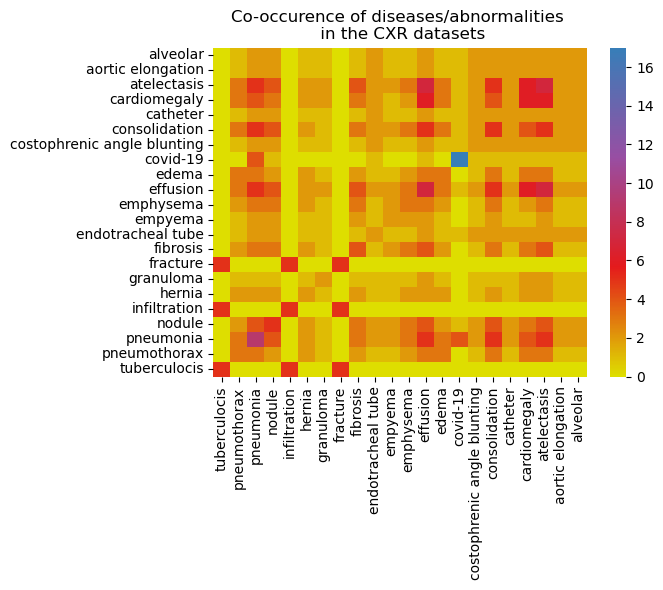

In [261]:
import matplotlib.colors
fig, ax = plt.subplots(figsize=(7,6))
norm=plt.Normalize(0,17)
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", ["#dede00","#e41a1c", "#984ea3", "#377eb8"])

ax = sns.heatmap(co_occurence_diseases, cmap=cmap)
ax.set(title="Co-occurence of diseases/abnormalities \n in the CXR datasets")

#ax.invert_yaxis()
ax.invert_xaxis()
#ax.set_xaxis(rotation=90)
#plt.xticks(rotation=45)
plt.tight_layout()
plt.savefig("Co-occurence_diseases")

In [262]:
#calculate how many datasets include the different diseases/abnormalities:
diseases_df = diseases_df.sum().reset_index(name ='Number of datasets')
#note dataset can contain multiple diseases/abnormalities. I have only included the diseases which are in at least 4 datasets.

In [263]:
diseases_df

,index,Number of datasets
0,alveolar,2
1,aortic elongation,2
2,atelectasis,7
3,cardiomegaly,6
4,catheter,2
5,consolidation,5
6,costophrenic angle blunting,2
7,covid-19,17
8,edema,3
9,effusion,7


In [264]:
diseases_df = diseases_df.sort_values(by="Number of datasets", ascending=False)

In [265]:
diseases_df

,index,Number of datasets
7,covid-19,17
19,pneumonia,9
2,atelectasis,7
9,effusion,7
3,cardiomegaly,6
21,tuberculocis,5
5,consolidation,5
18,nodule,5
17,infiltration,5
14,fracture,5


In [266]:
# displaying the datatypes
display(diseases_df.dtypes)

index                 object
Number of datasets     int64
dtype: object

In [267]:
#sort values by number of dataset, ascending order:
diseases_df=diseases_df.sort_values("Number of datasets", ascending=True)

In [268]:
#diseases_df=diseases_df[diseases_df['Number of datasets']>3]

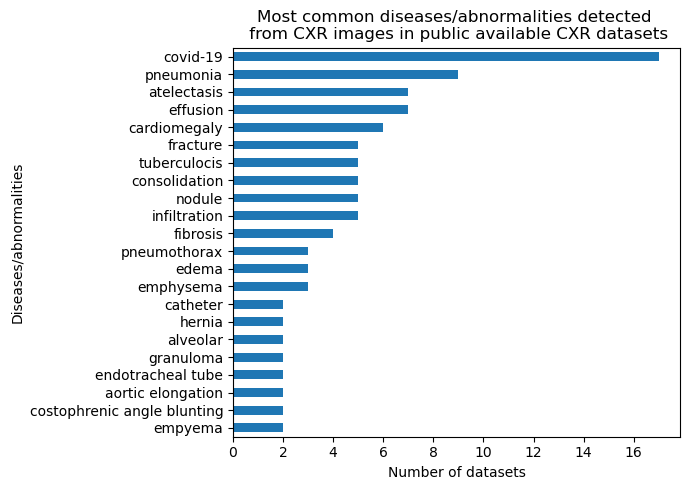

In [279]:
#plot the most common diseases/abnormalities and the number of datasets:
ax = diseases_df.plot.barh(x='index',y='Number of datasets', legend=False, title="Most common diseases/abnormalities detected \n from CXR images in public available CXR datasets", figsize=(7,5))
ax.set_xlabel("Number of datasets")
ax.set_ylabel("Diseases/abnormalities")
ax.locator_params('x',integer=True)
plt.tight_layout()
plt.savefig('diseases.png')

In [280]:
#create a data frame with the diseases being detected most often and number of images from each dataset:
diseases_df_images = df[['alveolar','aortic elongation','atelectasis','cardiomegaly', 'catheter','consolidation',
                  'costophrenic angle blunting','covid-19','edema', 'effusion', 'emphysema', 'empyema',
                  'endotracheal tube','fibrosis','fracture','granuloma','hernia','infiltration','nodule',
                  'pneumonia','pneumothorax','tuberculocis'
                  ]]

In [281]:
#convert false/true to dummies (0/1)
diseases_df_images = diseases_df_images.astype(int)

In [282]:
diseases_df_images

,alveolar,aortic elongation,atelectasis,cardiomegaly,catheter,consolidation,costophrenic angle blunting,covid-19,edema,effusion,...,endotracheal tube,fibrosis,fracture,granuloma,hernia,infiltration,nodule,pneumonia,pneumothorax,tuberculocis
1,1,1,1,1,1,1,1,1,0,1,...,1,0,0,0,0,0,1,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
8,0,0,1,1,0,1,0,0,1,1,...,0,1,0,0,1,0,1,1,1,0
9,0,0,1,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,1,1,0
10,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [283]:
#dataset names:
df_num = df['Number of images']

In [284]:
#convert to pandas df:
df_num = pd.DataFrame(data=df_num)

In [285]:
df_num

,Number of images
1,56171
4,572
5,527
6,910
8,112120
9,224316
10,2328
11,326
12,200
13,747


In [286]:
#merge with the diseases:
#diseases_df_images = df_num.merge(diseases_df_images, left_index=True, right_index=True)

In [287]:
diseases_df_images

,alveolar,aortic elongation,atelectasis,cardiomegaly,catheter,consolidation,costophrenic angle blunting,covid-19,edema,effusion,...,endotracheal tube,fibrosis,fracture,granuloma,hernia,infiltration,nodule,pneumonia,pneumothorax,tuberculocis
1,1,1,1,1,1,1,1,1,0,1,...,1,0,0,0,0,0,1,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,1,1,0,0,0,0,0,1,...,0,1,0,0,0,0,0,0,0,0
8,0,0,1,1,0,1,0,0,1,1,...,0,1,0,0,1,0,1,1,1,0
9,0,0,1,1,0,1,0,0,1,1,...,0,0,0,0,0,0,0,1,1,0
10,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
11,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
12,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
13,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


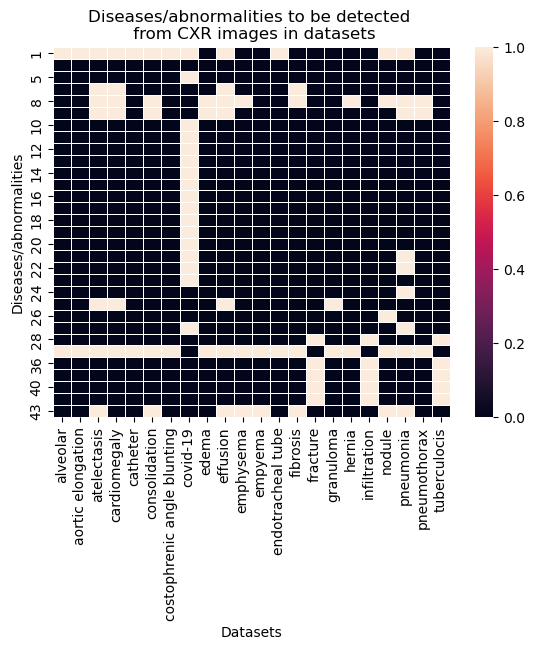

In [288]:
#make a heat map to show how many diseases is included for the different datasets TRANSPOSED:
ax = sns.heatmap(diseases_df_images, linewidth=.5)
ax.set(title="Diseases/abnormalities to be detected \n from CXR images in datasets")
#ax.invert_yaxis()
ax.set_xlabel("Datasets")
ax.set_ylabel("Diseases/abnormalities")
plt.savefig("dataset_diseases_T.png")

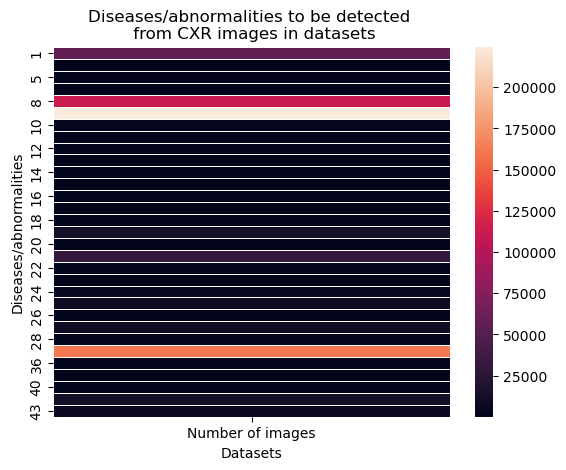

In [289]:
#make a heat map to show how many diseases is included for the different datasets TRANSPOSED:
ax = sns.heatmap(df_num, linewidth=.5)
ax.set(title="Diseases/abnormalities to be detected \n from CXR images in datasets")
#ax.invert_yaxis()
ax.set_xlabel("Datasets")
ax.set_ylabel("Diseases/abnormalities")
plt.savefig("dataset_diseases_T.png")

In [290]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i], y[i], ha = 'center')

In [292]:
#ax = diseases_df_images.plot.barh(x='Name', stacked=True, cmap='tab20')
#ax.legend(bbox_to_anchor=(1.1, 1.05))

# Metadata patients:

In [293]:
#inspect the number of images and number of images with patient age attached:
df[["Number of images","Patient age"]]

,Number of images,Patient age
1,56171,44824
4,572,0
5,527,0
6,910,0
8,112120,112120
9,224316,223414
10,2328,0
11,326,0
12,200,0
13,747,0


In [294]:
#convert number of images and patient age to integer:
df['Patient age']=df['Patient age'].astype(int)

/var/folders/pc/4yxzlm711hn0wmvrdybd88y80000gn/T/ipykernel_33564/3380919351.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [295]:
#convert to int:
df['Number of images']=df['Number of images'].astype(int)

/var/folders/pc/4yxzlm711hn0wmvrdybd88y80000gn/T/ipykernel_33564/3591977241.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [296]:
#calculate percentage of images with age for each dataset:
df["Percent age"]=(df['Patient age']/df['Number of images']*100)

/var/folders/pc/4yxzlm711hn0wmvrdybd88y80000gn/T/ipykernel_33564/1881010604.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [297]:
df['Percent age']

1      79.799185
4       0.000000
5       0.000000
6       0.000000
8     100.000000
9      99.597889
10      0.000000
11      0.000000
12      0.000000
13      0.000000
14      0.000000
15     82.332564
16      0.000000
17      0.000000
18      0.000000
19      0.000000
20      0.000000
21     93.299546
22      0.000000
23      0.000000
24      0.000000
25      0.000000
26    100.000000
27      0.000000
28    100.000000
34     99.996270
36    100.000000
39      0.000000
40      0.000000
41      0.000000
43      0.000000
Name: Percent age, dtype: float64

## Gender

In [298]:
df['Patient gender']

1      44824
4          0
5          0
6          0
8     112120
9     223414
10         0
11         0
12         0
13         0
14         0
15       803
16       243
17         0
18         0
19         0
20       852
21     28350
22         0
23         0
24         0
25         0
26       247
27         0
28       138
34    160857
36       662
39         0
40         0
41         0
43         0
Name: Patient gender, dtype: object

In [299]:
#convert to interger:
df['Patient gender']=df['Patient gender'].astype(int)

/var/folders/pc/4yxzlm711hn0wmvrdybd88y80000gn/T/ipykernel_33564/2925001339.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [300]:
#calculate percentage of images with gender/sex for each dataset:
df["Percent gender"]=(df['Patient gender']/df['Number of images']*100)

/var/folders/pc/4yxzlm711hn0wmvrdybd88y80000gn/T/ipykernel_33564/1281626440.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [301]:
#images with race etnicity:
df['Patient race/ethnicity']= df['Patient race/ethnicity']/df['Number of images']*100

/var/folders/pc/4yxzlm711hn0wmvrdybd88y80000gn/T/ipykernel_33564/4284676757.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [302]:
df[["Name","Percent gender", "Percent age", 'Patient race/ethnicity']]

,Name,Percent gender,Percent age,Patient race/ethnicity
1,BIMCV-COVID19+,79.799185,79.799185,0.0
4,Chest x-ray disease images,0.000000,0.000000,0.0
5,Chest X-Rays - Covid19 Pakistan,0.000000,0.000000,0.0
6,Chest X-Rays Dataset,0.000000,0.000000,0.0
8,ChestX-ray14,100.000000,100.000000,0.0
9,CheXpert,99.597889,99.597889,0.0
10,COVID 19 Xray Image Dataset with Huge Samples,0.000000,0.000000,0.0
11,COVID-19 AND NORMAL CHEST X-RAY,0.000000,0.000000,0.0
12,Covid-19 chest x-ray detection dataset,0.000000,0.000000,0.0
13,COVID-19 Chest X-Ray Image Repository,0.000000,0.000000,0.0


In [303]:
df.groupby('Percent age')[['Patient age']].count().reset_index()

,Percent age,Patient age
0,0.000000,22
1,79.799185,1
2,82.332564,1
3,93.299546,1
4,99.597889,1
5,99.996270,1
6,100.000000,4


In [304]:
df.groupby('Percent gender')[['Patient gender']].count().reset_index()

,Percent gender,Patient gender
0,0.000000,20
1,79.799185,1
2,92.725173,1
3,93.299546,1
4,99.597889,1
5,99.997513,1
6,100.000000,6


In [305]:
#total number of images:
num_images =df['Number of images'].sum()

In [306]:
#total images with patient age:
sum_age = df['Patient age'].sum()

In [307]:
sum_age

571323

In [308]:
#total images with patient gender/sex:
sum_gender = df['Patient gender'].sum()

In [309]:
sum_gender

572510

In [310]:
#calculate percentage of images with age described:
percentage_age_total = sum_age/num_images*100

In [311]:
#calculate percentage of images with sex/gender described:
percentage_gender_total = sum_gender/num_images*100

In [312]:
percentage_age_total

88.2875713164255

In [313]:
#not reported age:
nr_percentage_age_total=100-percentage_age_total

In [314]:
percentage_gender_total

88.47100056249575

In [315]:
#not reported gender:
nr_percentage_gender_total=100-percentage_gender_total

In [316]:
Patient_race = 0
Patient_race_not = 100

In [317]:
#make dataframe to plot:
metadata = {'Metadata':['Patient age', 'Patient sex', 'Patient race/ethnicity'],'Reported': [percentage_age_total, percentage_gender_total, Patient_race], 'Not reported': [nr_percentage_age_total, nr_percentage_gender_total, Patient_race_not]}
metadata_df = pd.DataFrame(data=metadata)
metadata_df

,Metadata,Reported,Not reported
0,Patient age,88.287571,11.712429
1,Patient sex,88.471001,11.528999
2,Patient race/ethnicity,0.000000,100.000000


In [318]:
metadata_df = metadata_df.sort_values('Reported', ascending=True)

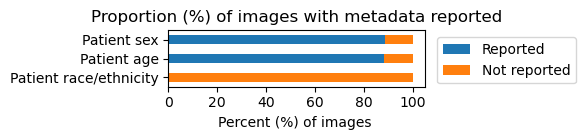

In [319]:
fig, ax = plt.subplots(figsize=(6, 1.5))
metadata_df.plot.barh(x='Metadata', stacked=True, title="Proportion (%) of images with metadata reported", width=0.5, ax=ax)
ax.set_xlabel("Percent (%) of images ")
ax.set(ylabel=None)
ax.legend(bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.savefig('metadata.png')

## Citations:

In [320]:
df['Number of citations']

1      142
4        0
5        0
6        0
8     3214
9     1562
10       0
11       1
12       0
13       0
14       1
15    1009
16      28
17       0
18       0
19      23
20     271
21    2567
22       0
23       0
24    2988
25     518
26     932
27       0
28     505
34     365
36     505
39      93
40      93
41      73
43       0
Name: Number of citations, dtype: object

In [321]:
citations_df=df[["Name", "Number of citations"]].reset_index()

In [322]:
citations_df

,index,Name,Number of citations
0,1,BIMCV-COVID19+,142
1,4,Chest x-ray disease images,0
2,5,Chest X-Rays - Covid19 Pakistan,0
3,6,Chest X-Rays Dataset,0
4,8,ChestX-ray14,3214
5,9,CheXpert,1562
6,10,COVID 19 Xray Image Dataset with Huge Samples,0
7,11,COVID-19 AND NORMAL CHEST X-RAY,1
8,12,Covid-19 chest x-ray detection dataset,0
9,13,COVID-19 Chest X-Ray Image Repository,0


In [323]:
#check type of citations:
citations_df["Number of citations"].describe()

count     31
unique    17
top        0
freq      12
Name: Number of citations, dtype: object

In [324]:
#to int:
citations_df["Number of citations"] = citations_df["Number of citations"].astype(str).astype(int)

In [325]:
#sort by number of citations:
citations_df = citations_df.sort_values("Number of citations", ascending=True)

In [326]:
#create dataframe without 0:
citations_df_not0 = citations_df[citations_df['Number of citations']>0]

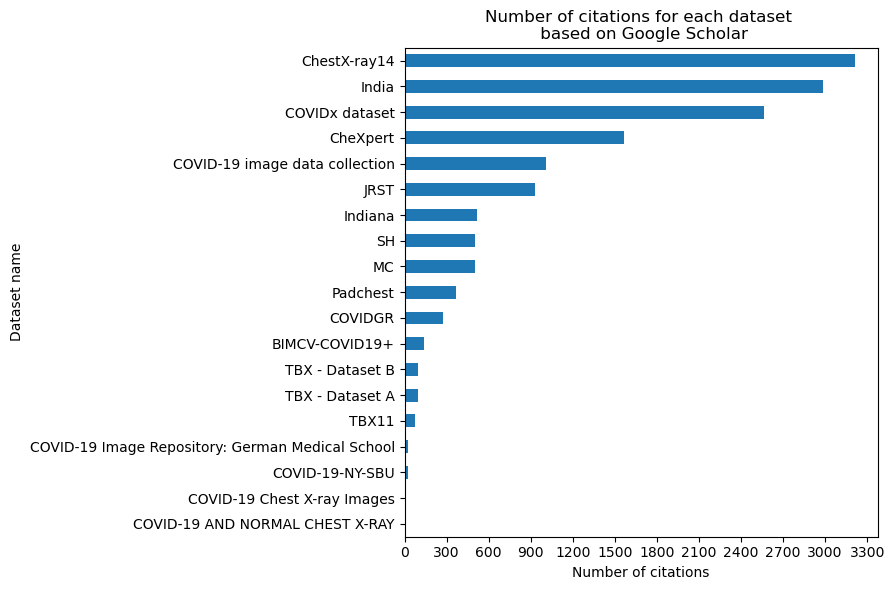

In [328]:
#plot the most common diseases/abnormalities and the number of datasets:
fig, ax = plt.subplots(figsize=(9
                        , 6))
citations_df_not0.plot.barh(x='Name',y='Number of citations', legend=False, title="Number of citations for each dataset \n based on Google Scholar", fontsize=10,ax =ax)
ax.set_ylabel("Dataset name")
ax.set_xlabel("Number of citations")
ax.xaxis.set_ticks(np.arange(0, 3301, 300))
plt.tight_layout()
plt.savefig('citations.png')

# Quality of datasets

In [329]:
#read characteristics and metadata quality from csv to df:
quality_df = pd.read_csv('../analysis/Quality.csv')

In [330]:
quality_df

,Unnamed: 0,Data set name,Country of origin,Year of dataset publication,Data collection period (Y/N),Statement on participant consent (Y/N),Statement on ethical approval (Y/N),Patient inclusion or exclusion criteria (Y/N),Number of images,Number of unique patients,View position,Diseases included,Patient age,Patient sex,Patient race/ethnicity
0,1,BIMCV-COVID19+,1,1,1,1,1,1,1,1,1,1,1,1,0
1,4,Chest x-ray disease images,0,1,0,0,0,0,1,0,0,0,0,0,0
2,5,Chest X-Rays - Covid19 Pakistan,1,1,1,0,0,0,1,1,1,1,0,0,0
3,6,Chest X-Rays Dataset,0,1,1,0,0,0,1,0,0,1,0,0,0
4,8,ChestX-ray14,1,1,1,0,0,0,1,1,1,1,1,1,0
5,9,CheXpert,1,1,1,0,0,0,1,1,1,1,1,1,0
6,10,COVID 19 Xray Image Dataset with Huge Samples,0,1,0,0,0,0,1,0,0,1,0,0,0
7,11,COVID-19 AND NORMAL CHEST X-RAY,1,1,0,0,0,0,1,0,0,1,0,0,0
8,12,Covid-19 chest x-ray detection dataset,0,1,0,0,0,0,1,0,0,1,0,0,0
9,13,COVID-19 Chest X-Ray Image Repository,0,1,0,0,0,0,1,0,0,1,0,0,0


In [331]:
#rename unnamed index:
quality_df = quality_df.rename(columns={'Unnamed: 0':'index'})

In [332]:
#count the number of dataset reporting each attribute/character:
quality_df_sum_col=quality_df.sum(axis=0).reset_index(name="count")

In [333]:
quality_df_sum_col

,index,count
0,index,627
1,Data set name,BIMCV-COVID19+Chest x-ray disease imagesChest ...
2,Country of origin,20
3,Year of dataset publication,31
4,Data collection period (Y/N),11
5,Statement on participant consent (Y/N),2
6,Statement on ethical approval (Y/N),8
7,Patient inclusion or exclusion criteria (Y/N),9
8,Number of images,31
9,Number of unique patients,11


In [334]:
#remove the dataset name column:
quality_df_sum_col=quality_df_sum_col[quality_df_sum_col['index']!='Data set name']

In [335]:
#remove the index column:
quality_df_sum_col=quality_df_sum_col[quality_df_sum_col['index']!='index']

In [336]:
#number of datasets:
n = quality_df['Data set name'].count()

In [337]:
n

31

In [338]:
#calculate the percentage of dataset reporting the character/attribute:
quality_df_sum_col['Reported']=quality_df_sum_col['count']/n*100

In [339]:
quality_df_sum_col

,index,count,Reported
2,Country of origin,20,64.516129
3,Year of dataset publication,31,100.0
4,Data collection period (Y/N),11,35.483871
5,Statement on participant consent (Y/N),2,6.451613
6,Statement on ethical approval (Y/N),8,25.806452
7,Patient inclusion or exclusion criteria (Y/N),9,29.032258
8,Number of images,31,100.0
9,Number of unique patients,11,35.483871
10,View position,18,58.064516
11,Diseases included,30,96.774194


In [340]:
#calculate the percentage of dataset NOT reporting the character/attribute:
quality_df_sum_col['Not reported']=(n-quality_df_sum_col['count'])/n*100

In [341]:
quality_df_sum_col

,index,count,Reported,Not reported
2,Country of origin,20,64.516129,35.483871
3,Year of dataset publication,31,100.0,0.0
4,Data collection period (Y/N),11,35.483871,64.516129
5,Statement on participant consent (Y/N),2,6.451613,93.548387
6,Statement on ethical approval (Y/N),8,25.806452,74.193548
7,Patient inclusion or exclusion criteria (Y/N),9,29.032258,70.967742
8,Number of images,31,100.0,0.0
9,Number of unique patients,11,35.483871,64.516129
10,View position,18,58.064516,41.935484
11,Diseases included,30,96.774194,3.225806


In [342]:
quality_df_sum_col = quality_df_sum_col.replace({'Data collection period (Y/N)':'Data collection period', 'Statement on participant consent (Y/N)': 'Statement on participant consent', 'Statement on ethical approval (Y/N)':'Statement on ethical approval', 'Patient inclusion or exclusion criteria (Y/N)': 'Patient inclusion or exclusion criteria'})

In [343]:
#drop the count column before plot:
quality_df_sum_col= quality_df_sum_col.drop(columns=['count'])

In [344]:
#sort by proportion of datasets reporting characteristics)
quality_df_sum_col =quality_df_sum_col.sort_values(by=['Reported'], ascending=True)

In [345]:
quality_df_sum_col

,index,Reported,Not reported
14,Patient race/ethnicity,0.000000,100.000000
5,Statement on participant consent,6.451613,93.548387
6,Statement on ethical approval,25.806452,74.193548
7,Patient inclusion or exclusion criteria,29.032258,70.967742
12,Patient age,29.032258,70.967742
4,Data collection period,35.483871,64.516129
9,Number of unique patients,35.483871,64.516129
13,Patient sex,35.483871,64.516129
10,View position,58.064516,41.935484
2,Country of origin,64.516129,35.483871


In [347]:
metadata_df = quality_df_sum_col.loc[quality_df_sum_col['index'].isin(['Patient age', 'Patient sex', 'Patient race/ethnicity'])]


In [348]:
metadata_df

,index,Reported,Not reported
14,Patient race/ethnicity,0.000000,100.000000
12,Patient age,29.032258,70.967742
13,Patient sex,35.483871,64.516129


In [350]:
characteristics_df= quality_df_sum_col.loc[~quality_df_sum_col['index'].isin(['Patient age', 'Patient sex', 'Patient race/ethnicity'])]

In [351]:
characteristics_df

,index,Reported,Not reported
5,Statement on participant consent,6.451613,93.548387
6,Statement on ethical approval,25.806452,74.193548
7,Patient inclusion or exclusion criteria,29.032258,70.967742
4,Data collection period,35.483871,64.516129
9,Number of unique patients,35.483871,64.516129
10,View position,58.064516,41.935484
2,Country of origin,64.516129,35.483871
11,Diseases included,96.774194,3.225806
3,Year of dataset publication,100.000000,0.000000
8,Number of images,100.000000,0.000000


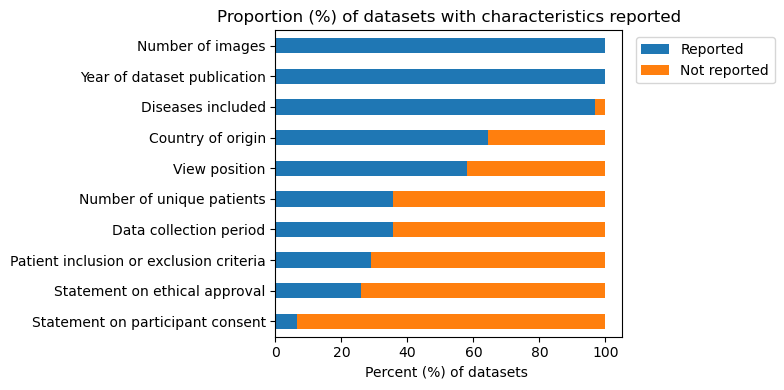

In [352]:
fig, ax = plt.subplots(figsize=(8, 4))
characteristics_df.plot.barh(x='index', stacked=True, title="Proportion (%) of datasets with characteristics reported", width=0.5, ax=ax)
ax.set_xlabel("Percent (%) of datasets ")
ax.set(ylabel=None)
ax.legend(bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.savefig('characteristics_reported.png')

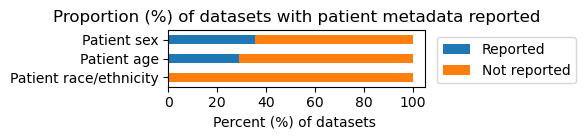

In [353]:
fig, ax = plt.subplots(figsize=(6, 1.5))
metadata_df.plot.barh(x='index', stacked=True, title="Proportion (%) of datasets with patient metadata reported", width=0.5, ax=ax)
ax.set_xlabel("Percent (%) of datasets ")
ax.set(ylabel=None)
ax.legend(bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.savefig('patient_metadata_reported.png')

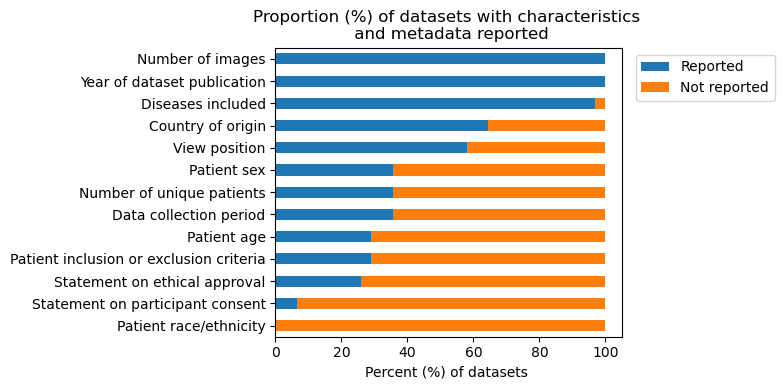

In [354]:
fig, ax = plt.subplots(figsize=(8, 4))
quality_df_sum_col.plot.barh(x='index', stacked=True, title="Proportion (%) of datasets with characteristics \n and metadata reported", width=0.5, ax=ax)
ax.set_xlabel("Percent (%) of datasets ")
ax.set(ylabel=None)
ax.legend(bbox_to_anchor=(1.02, 1))
plt.tight_layout()
plt.savefig('all_quality.png')

In [355]:
quality_df

,index,Data set name,Country of origin,Year of dataset publication,Data collection period (Y/N),Statement on participant consent (Y/N),Statement on ethical approval (Y/N),Patient inclusion or exclusion criteria (Y/N),Number of images,Number of unique patients,View position,Diseases included,Patient age,Patient sex,Patient race/ethnicity
0,1,BIMCV-COVID19+,1,1,1,1,1,1,1,1,1,1,1,1,0
1,4,Chest x-ray disease images,0,1,0,0,0,0,1,0,0,0,0,0,0
2,5,Chest X-Rays - Covid19 Pakistan,1,1,1,0,0,0,1,1,1,1,0,0,0
3,6,Chest X-Rays Dataset,0,1,1,0,0,0,1,0,0,1,0,0,0
4,8,ChestX-ray14,1,1,1,0,0,0,1,1,1,1,1,1,0
5,9,CheXpert,1,1,1,0,0,0,1,1,1,1,1,1,0
6,10,COVID 19 Xray Image Dataset with Huge Samples,0,1,0,0,0,0,1,0,0,1,0,0,0
7,11,COVID-19 AND NORMAL CHEST X-RAY,1,1,0,0,0,0,1,0,0,1,0,0,0
8,12,Covid-19 chest x-ray detection dataset,0,1,0,0,0,0,1,0,0,1,0,0,0
9,13,COVID-19 Chest X-Ray Image Repository,0,1,0,0,0,0,1,0,0,1,0,0,0


In [356]:
quality_df = quality_df.drop(columns=['index'])

In [357]:
quality_df

,Data set name,Country of origin,Year of dataset publication,Data collection period (Y/N),Statement on participant consent (Y/N),Statement on ethical approval (Y/N),Patient inclusion or exclusion criteria (Y/N),Number of images,Number of unique patients,View position,Diseases included,Patient age,Patient sex,Patient race/ethnicity
0,BIMCV-COVID19+,1,1,1,1,1,1,1,1,1,1,1,1,0
1,Chest x-ray disease images,0,1,0,0,0,0,1,0,0,0,0,0,0
2,Chest X-Rays - Covid19 Pakistan,1,1,1,0,0,0,1,1,1,1,0,0,0
3,Chest X-Rays Dataset,0,1,1,0,0,0,1,0,0,1,0,0,0
4,ChestX-ray14,1,1,1,0,0,0,1,1,1,1,1,1,0
5,CheXpert,1,1,1,0,0,0,1,1,1,1,1,1,0
6,COVID 19 Xray Image Dataset with Huge Samples,0,1,0,0,0,0,1,0,0,1,0,0,0
7,COVID-19 AND NORMAL CHEST X-RAY,1,1,0,0,0,0,1,0,0,1,0,0,0
8,Covid-19 chest x-ray detection dataset,0,1,0,0,0,0,1,0,0,1,0,0,0
9,COVID-19 Chest X-Ray Image Repository,0,1,0,0,0,0,1,0,0,1,0,0,0


In [358]:
quality_df

,Data set name,Country of origin,Year of dataset publication,Data collection period (Y/N),Statement on participant consent (Y/N),Statement on ethical approval (Y/N),Patient inclusion or exclusion criteria (Y/N),Number of images,Number of unique patients,View position,Diseases included,Patient age,Patient sex,Patient race/ethnicity
0,BIMCV-COVID19+,1,1,1,1,1,1,1,1,1,1,1,1,0
1,Chest x-ray disease images,0,1,0,0,0,0,1,0,0,0,0,0,0
2,Chest X-Rays - Covid19 Pakistan,1,1,1,0,0,0,1,1,1,1,0,0,0
3,Chest X-Rays Dataset,0,1,1,0,0,0,1,0,0,1,0,0,0
4,ChestX-ray14,1,1,1,0,0,0,1,1,1,1,1,1,0
5,CheXpert,1,1,1,0,0,0,1,1,1,1,1,1,0
6,COVID 19 Xray Image Dataset with Huge Samples,0,1,0,0,0,0,1,0,0,1,0,0,0
7,COVID-19 AND NORMAL CHEST X-RAY,1,1,0,0,0,0,1,0,0,1,0,0,0
8,Covid-19 chest x-ray detection dataset,0,1,0,0,0,0,1,0,0,1,0,0,0
9,COVID-19 Chest X-Ray Image Repository,0,1,0,0,0,0,1,0,0,1,0,0,0


In [359]:
#count the quality of datasets:
quality_df['sum'] = quality_df.sum(axis=1, numeric_only=True)

In [360]:
quality_df

,Data set name,Country of origin,Year of dataset publication,Data collection period (Y/N),Statement on participant consent (Y/N),Statement on ethical approval (Y/N),Patient inclusion or exclusion criteria (Y/N),Number of images,Number of unique patients,View position,Diseases included,Patient age,Patient sex,Patient race/ethnicity,sum
0,BIMCV-COVID19+,1,1,1,1,1,1,1,1,1,1,1,1,0,12
1,Chest x-ray disease images,0,1,0,0,0,0,1,0,0,0,0,0,0,2
2,Chest X-Rays - Covid19 Pakistan,1,1,1,0,0,0,1,1,1,1,0,0,0,7
3,Chest X-Rays Dataset,0,1,1,0,0,0,1,0,0,1,0,0,0,4
4,ChestX-ray14,1,1,1,0,0,0,1,1,1,1,1,1,0,9
5,CheXpert,1,1,1,0,0,0,1,1,1,1,1,1,0,9
6,COVID 19 Xray Image Dataset with Huge Samples,0,1,0,0,0,0,1,0,0,1,0,0,0,3
7,COVID-19 AND NORMAL CHEST X-RAY,1,1,0,0,0,0,1,0,0,1,0,0,0,4
8,Covid-19 chest x-ray detection dataset,0,1,0,0,0,0,1,0,0,1,0,0,0,3
9,COVID-19 Chest X-Ray Image Repository,0,1,0,0,0,0,1,0,0,1,0,0,0,3


In [361]:
quality_df['Percentage quality']=quality_df['sum']/13*100

In [362]:
quality_df

,Data set name,Country of origin,Year of dataset publication,Data collection period (Y/N),Statement on participant consent (Y/N),Statement on ethical approval (Y/N),Patient inclusion or exclusion criteria (Y/N),Number of images,Number of unique patients,View position,Diseases included,Patient age,Patient sex,Patient race/ethnicity,sum,Percentage quality
0,BIMCV-COVID19+,1,1,1,1,1,1,1,1,1,1,1,1,0,12,92.307692
1,Chest x-ray disease images,0,1,0,0,0,0,1,0,0,0,0,0,0,2,15.384615
2,Chest X-Rays - Covid19 Pakistan,1,1,1,0,0,0,1,1,1,1,0,0,0,7,53.846154
3,Chest X-Rays Dataset,0,1,1,0,0,0,1,0,0,1,0,0,0,4,30.769231
4,ChestX-ray14,1,1,1,0,0,0,1,1,1,1,1,1,0,9,69.230769
5,CheXpert,1,1,1,0,0,0,1,1,1,1,1,1,0,9,69.230769
6,COVID 19 Xray Image Dataset with Huge Samples,0,1,0,0,0,0,1,0,0,1,0,0,0,3,23.076923
7,COVID-19 AND NORMAL CHEST X-RAY,1,1,0,0,0,0,1,0,0,1,0,0,0,4,30.769231
8,Covid-19 chest x-ray detection dataset,0,1,0,0,0,0,1,0,0,1,0,0,0,3,23.076923
9,COVID-19 Chest X-Ray Image Repository,0,1,0,0,0,0,1,0,0,1,0,0,0,3,23.076923


In [363]:
quality_df[['Data set name', 'Percentage quality']]

,Data set name,Percentage quality
0,BIMCV-COVID19+,92.307692
1,Chest x-ray disease images,15.384615
2,Chest X-Rays - Covid19 Pakistan,53.846154
3,Chest X-Rays Dataset,30.769231
4,ChestX-ray14,69.230769
5,CheXpert,69.230769
6,COVID 19 Xray Image Dataset with Huge Samples,23.076923
7,COVID-19 AND NORMAL CHEST X-RAY,30.769231
8,Covid-19 chest x-ray detection dataset,23.076923
9,COVID-19 Chest X-Ray Image Repository,23.076923


In [364]:
quality_df = quality_df.sort_values(by=["Percentage quality"], ascending=True)

In [365]:
quality_df =quality_df.rename(columns={"Data set name": "Name"})

In [366]:
quality_df_new = quality_df[["Name", "Percentage quality"]]

In [367]:
quality_df_new

,Name,Percentage quality
1,Chest x-ray disease images,15.384615
30,X-Ray Lung Image Dataset,23.076923
23,Lung Diseases X-Rays (Grayscale),23.076923
19,Detecting-COVID-19-in-X-ray-images,23.076923
6,COVID 19 Xray Image Dataset with Huge Samples,23.076923
8,Covid-19 chest x-ray detection dataset,23.076923
9,COVID-19 Chest X-Ray Image Repository,23.076923
13,CovID-19 X-ray,23.076923
14,Covid-19 Xray images,23.076923
3,Chest X-Rays Dataset,30.769231


In [368]:
#count number of dataset according to percent:
quality_df_new.groupby("Percentage quality")[["Name"]].count().reset_index()

,Percentage quality,Name
0,15.384615,1
1,23.076923,8
2,30.769231,3
3,38.461538,1
4,46.153846,3
5,53.846154,4
6,61.538462,5
7,69.230769,3
8,84.615385,1
9,92.307692,2


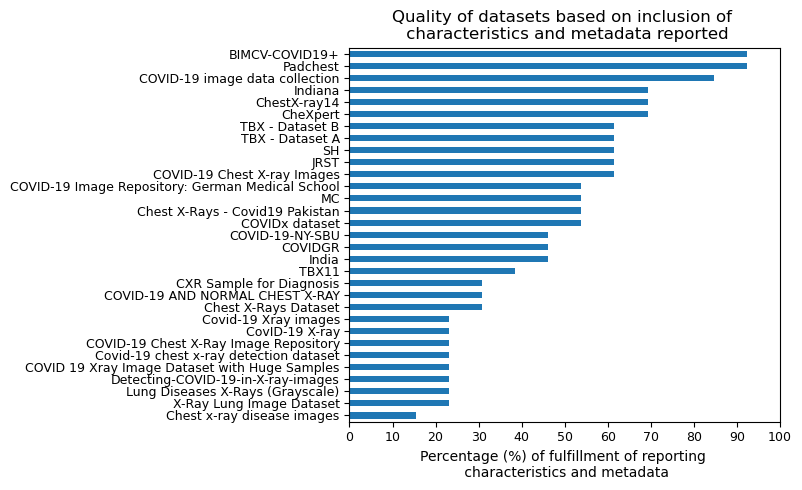

In [370]:
fig, ax = plt.subplots(figsize=(8, 5))
#color = [{y<50: 'red', y==50: 'red', y>50:'blue'}[True] for y in quality_df['Percentage quality']]
quality_df_new.plot.barh(x='Name', y="Percentage quality", legend=False, title='Quality of datasets based on inclusion of \n characteristics and metadata reported', fontsize=9, ax=ax)
ax.set(ylabel=None)
ax.set(xlabel='Percentage (%) of fulfillment of reporting \n characteristics and metadata')
plt.tight_layout()
plt.xticks(range(0, 101,10))
plt.savefig('quality.png')

In [371]:
quality_df

,Name,Country of origin,Year of dataset publication,Data collection period (Y/N),Statement on participant consent (Y/N),Statement on ethical approval (Y/N),Patient inclusion or exclusion criteria (Y/N),Number of images,Number of unique patients,View position,Diseases included,Patient age,Patient sex,Patient race/ethnicity,sum,Percentage quality
1,Chest x-ray disease images,0,1,0,0,0,0,1,0,0,0,0,0,0,2,15.384615
30,X-Ray Lung Image Dataset,0,1,0,0,0,0,1,0,0,1,0,0,0,3,23.076923
23,Lung Diseases X-Rays (Grayscale),0,1,0,0,0,0,1,0,0,1,0,0,0,3,23.076923
19,Detecting-COVID-19-in-X-ray-images,0,1,0,0,0,0,1,0,0,1,0,0,0,3,23.076923
6,COVID 19 Xray Image Dataset with Huge Samples,0,1,0,0,0,0,1,0,0,1,0,0,0,3,23.076923
8,Covid-19 chest x-ray detection dataset,0,1,0,0,0,0,1,0,0,1,0,0,0,3,23.076923
9,COVID-19 Chest X-Ray Image Repository,0,1,0,0,0,0,1,0,0,1,0,0,0,3,23.076923
13,CovID-19 X-ray,0,1,0,0,0,0,1,0,0,1,0,0,0,3,23.076923
14,Covid-19 Xray images,0,1,0,0,0,0,1,0,0,1,0,0,0,3,23.076923
3,Chest X-Rays Dataset,0,1,1,0,0,0,1,0,0,1,0,0,0,4,30.769231


In [372]:
quality_df = quality_df.reset_index()

In [373]:
covid_19_df = df['covid-19'].reset_index()

In [374]:
covid_19_df

,index,covid-19
0,1,True
1,4,False
2,5,True
3,6,False
4,8,False
5,9,False
6,10,True
7,11,True
8,12,True
9,13,True


In [375]:
covid_19_df.groupby('covid-19').count()

,index
covid-19,
False,14
True,17


In [376]:
#merge quality with covid-19
covid_quality = covid_19_df.merge(quality_df, on='index')

In [377]:
covid_quality

,index,covid-19,Name,Country of origin,Year of dataset publication,Data collection period (Y/N),Statement on participant consent (Y/N),Statement on ethical approval (Y/N),Patient inclusion or exclusion criteria (Y/N),Number of images,Number of unique patients,View position,Diseases included,Patient age,Patient sex,Patient race/ethnicity,sum,Percentage quality
0,1,True,Chest x-ray disease images,0,1,0,0,0,0,1,0,0,0,0,0,0,2,15.384615
1,4,False,ChestX-ray14,1,1,1,0,0,0,1,1,1,1,1,1,0,9,69.230769
2,5,True,CheXpert,1,1,1,0,0,0,1,1,1,1,1,1,0,9,69.230769
3,6,False,COVID 19 Xray Image Dataset with Huge Samples,0,1,0,0,0,0,1,0,0,1,0,0,0,3,23.076923
4,8,False,Covid-19 chest x-ray detection dataset,0,1,0,0,0,0,1,0,0,1,0,0,0,3,23.076923
5,9,False,COVID-19 Chest X-Ray Image Repository,0,1,0,0,0,0,1,0,0,1,0,0,0,3,23.076923
6,10,True,COVID-19 Chest X-ray Images,1,1,0,0,1,1,1,1,1,1,0,0,0,8,61.538462
7,11,True,COVID-19 image data collection,1,1,1,0,1,1,1,1,1,1,1,1,0,11,84.615385
8,12,True,COVID-19 Image Repository: German Medical School,1,1,0,0,0,0,1,1,1,1,0,1,0,7,53.846154
9,13,True,CovID-19 X-ray,0,1,0,0,0,0,1,0,0,1,0,0,0,3,23.076923


In [378]:
se_covid =  covid_quality.groupby('covid-19').sem().reset_index()

In [379]:
se_covid

,covid-19,index,Country of origin,Year of dataset publication,Data collection period (Y/N),Statement on participant consent (Y/N),Statement on ethical approval (Y/N),Patient inclusion or exclusion criteria (Y/N),Number of images,Number of unique patients,View position,Diseases included,Patient age,Patient sex,Patient race/ethnicity,sum,Percentage quality
0,False,3.648630,0.182981,0.0,0.188982,0.125,0.163663,0.163663,0.0,0.163663,0.182981,0.000000,0.188982,0.188982,0.0,1.179248,9.071136
1,True,1.597603,0.119471,0.0,0.106046,0.000,0.113911,0.113911,0.0,0.123038,0.119471,0.058824,0.106046,0.119471,0.0,0.644379,4.956765


In [380]:
se_covid= se_covid.drop(columns=['index', 'sum', 'Percentage quality'])

In [381]:
#split up the std error by covid and non covid 
se_non_covid19 = se_covid.iloc[0].reset_index()
se_covid19 = se_covid.iloc[1].reset_index()

In [382]:
#remove first row with false/true
se_non_covid19= se_non_covid19.iloc[1:]
se_covid19= se_covid19.iloc[1:]

In [383]:
#rename column SE
se_covid19=se_covid19.rename(columns={1: "SE"})

se_non_covid19=se_non_covid19.rename(columns={0: "SE"})

In [384]:
#convert means to lists:
se_covid19=se_covid19['SE'].tolist()
se_non_covid19=se_non_covid19['SE'].tolist()

In [385]:
mean_covid =  covid_quality.groupby('covid-19').mean().reset_index()

In [386]:
mean_covid

,covid-19,index,Country of origin,Year of dataset publication,Data collection period (Y/N),Statement on participant consent (Y/N),Statement on ethical approval (Y/N),Patient inclusion or exclusion criteria (Y/N),Number of images,Number of unique patients,View position,Diseases included,Patient age,Patient sex,Patient race/ethnicity,sum,Percentage quality
0,False,16.250000,0.625000,1.0,0.500000,0.125,0.250000,0.250000,1.0,0.250000,0.625000,1.000000,0.500000,0.500000,0.0,6.625000,50.961538
1,True,15.529412,0.647059,1.0,0.235294,0.000,0.294118,0.294118,1.0,0.411765,0.647059,0.941176,0.235294,0.352941,0.0,6.058824,46.606335


In [387]:
#test if there is a difference between the means of quality:
from scipy import stats
stats.ttest_ind(55.208333, 50.490196)

/var/folders/pc/4yxzlm711hn0wmvrdybd88y80000gn/T/ipykernel_33564/200057654.py:3: RuntimeWarning:

Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.

/Users/stinnawinther/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1250: RuntimeWarning:

divide by zero encountered in true_divide

/Users/stinnawinther/opt/anaconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:1250: RuntimeWarning:

invalid value encountered in double_scalars



Ttest_indResult(statistic=nan, pvalue=nan)

In [388]:
mean_covid= mean_covid.drop(columns=['index', 'sum', 'Percentage quality'])

In [389]:
#split up the mean by covid and non covid 
non_covid19 = mean_covid.iloc[0].reset_index()
covid19 = mean_covid.iloc[1].reset_index()

In [390]:
#remove first row with false/true
non_covid19= non_covid19.iloc[1:]
covid19= covid19.iloc[1:]

In [391]:
non_covid19

,index,0
1,Country of origin,0.625
2,Year of dataset publication,1.0
3,Data collection period (Y/N),0.5
4,Statement on participant consent (Y/N),0.125
5,Statement on ethical approval (Y/N),0.25
6,Patient inclusion or exclusion criteria (Y/N),0.25
7,Number of images,1.0
8,Number of unique patients,0.25
9,View position,0.625
10,Diseases included,1.0


In [392]:
index = covid19['index']

In [393]:
index

1                                 Country of origin
2                       Year of dataset publication
3                      Data collection period (Y/N)
4            Statement on participant consent (Y/N)
5               Statement on ethical approval (Y/N)
6     Patient inclusion or exclusion criteria (Y/N)
7                                  Number of images
8                         Number of unique patients
9                                     View position
10                                Diseases included
11                                      Patient age
12                                      Patient sex
13                           Patient race/ethnicity
Name: index, dtype: object

In [394]:
covid19=covid19.rename(columns={1: "mean"})

non_covid19=non_covid19.rename(columns={0: "mean"})

In [395]:
covid19

,index,mean
1,Country of origin,0.647059
2,Year of dataset publication,1.0
3,Data collection period (Y/N),0.235294
4,Statement on participant consent (Y/N),0.0
5,Statement on ethical approval (Y/N),0.294118
6,Patient inclusion or exclusion criteria (Y/N),0.294118
7,Number of images,1.0
8,Number of unique patients,0.411765
9,View position,0.647059
10,Diseases included,0.941176


In [396]:
#convert means to lis
mean_covid19=covid19['mean'].tolist()
mean_non_covid19=non_covid19['mean'].tolist()

In [397]:
se_non_covid19

[0.18298126367784995,
 0.0,
 0.1889822365046136,
 0.125,
 0.16366341767699427,
 0.16366341767699427,
 0.0,
 0.1636634176769943,
 0.18298126367784995,
 0.0,
 0.1889822365046136,
 0.1889822365046136,
 0.0]

In [398]:
se_covid19

[0.11947115300935238,
 0.0,
 0.10604562574894086,
 0.0,
 0.11391127488845344,
 0.11391127488845344,
 0.0,
 0.12303823919618757,
 0.11947115300935236,
 0.058823529411764705,
 0.10604562574894087,
 0.11947115300935235,
 0.0]

<ErrorbarContainer object of 3 artists>

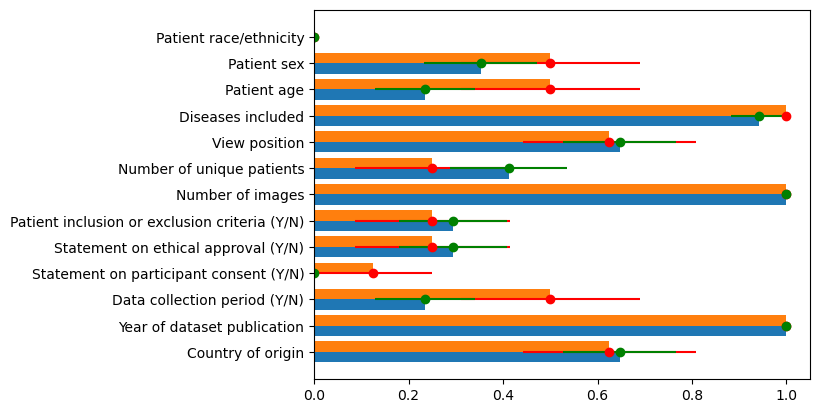

In [399]:
# create data
x = np.arange(13)
width = 0.40
# plot data in grouped manner of bar type
plt.barh(x-0.2, mean_covid19, width)
plt.barh(x+0.2, mean_non_covid19, width)
plt.errorbar(mean_non_covid19,index, xerr=se_non_covid19, fmt="o", color="r")
plt.errorbar(mean_covid19,index, xerr=se_covid19, fmt="o", color="g")

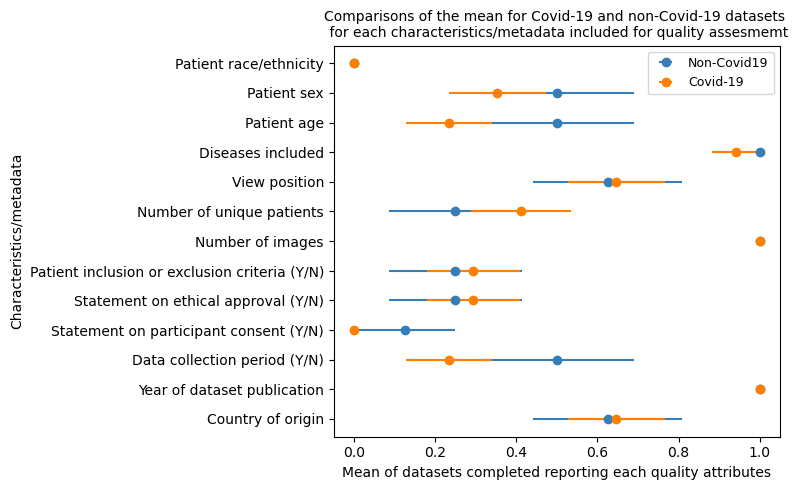

In [527]:
#barplot that compares the mean of the covid-19 with non-19 on all quality parameters.
fig, ax = plt.subplots(figsize=(8,5))
#ax = df_mean_covid = pd.DataFrame({'non-covid19': mean_non_covid19,'covid19': mean_covid19}, index=index)
ax = plt.errorbar(mean_non_covid19,index, xerr=se_non_covid19, fmt="o", color="#377eb8", label='Non-Covid19')
ax = plt.errorbar(mean_covid19,index, xerr=se_covid19, fmt="o", color="#ff7f00", label='Covid-19')
plt.title('Comparisons of the mean for Covid-19 and non-Covid-19 datasets \n for each characteristics/metadata included for quality assesmemt', fontsize=10)
plt.xlabel('Mean of datasets completed reporting each quality attributes')
plt.ylabel('Characteristics/metadata')
#plt.legend()
plt.legend(loc='upper right', prop={'size':9})
plt.tight_layout()
plt.savefig('mean_covid.png')
#ax.set_title='Comparisons of datasets detecting Covid-19 or not \n the mean for reporting characteristics and metadata '
#ax = df_mean_covid.plot.barh(title='Comparisons of datasets detecting Covid-19 or not \n the mean for reporting characteristics and metadata ')


In [402]:
#ANOVA to see if there exists a statistically significant difference between the mean values of more than one group.
from scipy.stats import f_oneway
# Conduct the one-way ANOVA
f_oneway(mean_covid19, mean_non_covid19)

F_onewayResult(statistic=0.1043577746160728, pvalue=0.7494592774859669)

## Correlation between quality and other characteristics:

### Correlation between quality percent and other characteristics about the datasets:

In [403]:
#add index as row:
quality_df = quality_df[['Percentage quality']].reset_index()

In [404]:
quality_df

,index,Percentage quality
0,0,15.384615
1,1,23.076923
2,2,23.076923
3,3,23.076923
4,4,23.076923
5,5,23.076923
6,6,23.076923
7,7,23.076923
8,8,23.076923
9,9,30.769231


In [410]:
#selected column to check for correlation with quality and add index:
oa_df_correlation = oa_df[['Year of publication','Number of citations', 'Labels', 'Number of images','Number of unique patients', 'Patient age', 'Patient gender']].reset_index()

In [411]:
#convert not reported (NR) to missing values:
oa_df_correlation = oa_df_correlation.replace('NR', np.nan)

In [412]:
oa_df_correlation

,index,Year of publication,Number of citations,Labels,Number of images,Number of unique patients,Patient age,Patient gender
0,1,2020,142,NaN,56171,24942,44824,44824
1,4,2023,0,NaN,572,NaN,0,0
2,5,2020,0,2,527,75,0,0
3,6,2018,0,5,910,NaN,0,0
4,8,2017,3214,14,112120,30805,112120,112120
5,9,2019,1562,14,224316,65240,223414,223414
6,10,2020,0,NaN,2328,NaN,0,0
7,11,2021,1,NaN,326,NaN,0,0
8,12,2020,0,NaN,200,NaN,0,0
9,13,2020,0,NaN,747,NaN,0,0


In [413]:
#convert to float and then int:
oa_df_correlation = oa_df_correlation.astype('float64').astype('Int64')

In [414]:
oa_df_correlation

,index,Year of publication,Number of citations,Labels,Number of images,Number of unique patients,Patient age,Patient gender
0,1,2020,142,<NA>,56171,24942,44824,44824
1,4,2023,0,<NA>,572,<NA>,0,0
2,5,2020,0,2,527,75,0,0
3,6,2018,0,5,910,<NA>,0,0
4,8,2017,3214,14,112120,30805,112120,112120
5,9,2019,1562,14,224316,65240,223414,223414
6,10,2020,0,<NA>,2328,<NA>,0,0
7,11,2021,1,<NA>,326,<NA>,0,0
8,12,2020,0,<NA>,200,<NA>,0,0
9,13,2020,0,<NA>,747,<NA>,0,0


In [438]:
#rename gender to sex:
oa_df_correlation= oa_df_correlation.rename(columns={'Patient gender':'Patient sex'})

In [439]:
#merge dataframes to find correlation between columns:
merged_corr = quality_df.merge(oa_df_correlation, left_on='index', right_on='index')

In [440]:
corrM = merged_corr.corr(method ='pearson')

In [441]:
corrM

,index,Percentage quality,Year of publication,Number of citations,Labels,Number of images,Number of unique patients,Patient age,Patient sex
index,1.000000,0.972893,-0.371092,0.117177,-0.353365,-0.307953,-0.394095,-0.314347,-0.314057
Percentage quality,0.972893,1.000000,-0.352084,0.037517,-0.379085,-0.336862,-0.454393,-0.343739,-0.343254
Year of publication,-0.371092,-0.352084,1.000000,-0.262679,0.115097,-0.000898,-0.207585,-0.010976,-0.010699
Number of citations,0.117177,0.037517,-0.262679,1.000000,0.481990,0.481044,0.533745,0.483532,0.483411
Labels,-0.353365,-0.379085,0.115097,0.481990,1.000000,0.495789,0.238840,0.497884,0.498190
Number of images,-0.307953,-0.336862,-0.000898,0.481044,0.495789,1.000000,0.983480,0.996969,0.996929
Number of unique patients,-0.394095,-0.454393,-0.207585,0.533745,0.238840,0.983480,1.000000,0.978399,0.978333
Patient age,-0.314347,-0.343739,-0.010976,0.483532,0.497884,0.996969,0.978399,1.000000,0.999994
Patient sex,-0.314057,-0.343254,-0.010699,0.483411,0.498190,0.996929,0.978333,0.999994,1.000000


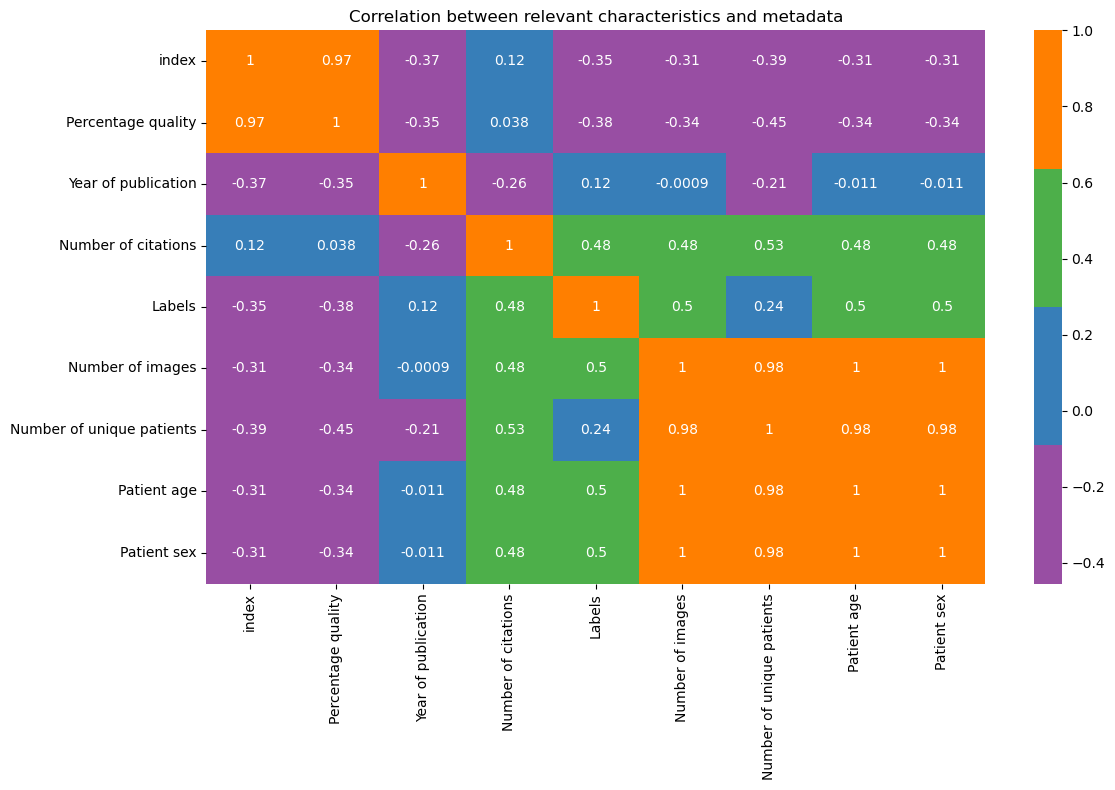

In [443]:
#plotting the heatmap for correlation
cmap=['#984ea3','#377eb8', '#4daf4a', '#ff7f00']
fig, ax=plt.subplots(figsize=(12,8))
ax = sns.heatmap(corrM, cmap=cmap, annot=True)
ax.set_title('Correlation between relevant characteristics and metadata')
plt.tight_layout()
plt.savefig("correlation_citation.png")

### Correlation between Y/N and citations:

In [444]:
## correlation Y/N reporting:
#read characteristics and metadata quality from csv to df:
quality_df = pd.read_csv('../analysis/Quality.csv')

In [445]:
quality_df

,Unnamed: 0,Data set name,Country of origin,Year of dataset publication,Data collection period (Y/N),Statement on participant consent (Y/N),Statement on ethical approval (Y/N),Patient inclusion or exclusion criteria (Y/N),Number of images,Number of unique patients,View position,Diseases included,Patient age,Patient sex,Patient race/ethnicity
0,1,BIMCV-COVID19+,1,1,1,1,1,1,1,1,1,1,1,1,0
1,4,Chest x-ray disease images,0,1,0,0,0,0,1,0,0,0,0,0,0
2,5,Chest X-Rays - Covid19 Pakistan,1,1,1,0,0,0,1,1,1,1,0,0,0
3,6,Chest X-Rays Dataset,0,1,1,0,0,0,1,0,0,1,0,0,0
4,8,ChestX-ray14,1,1,1,0,0,0,1,1,1,1,1,1,0
5,9,CheXpert,1,1,1,0,0,0,1,1,1,1,1,1,0
6,10,COVID 19 Xray Image Dataset with Huge Samples,0,1,0,0,0,0,1,0,0,1,0,0,0
7,11,COVID-19 AND NORMAL CHEST X-RAY,1,1,0,0,0,0,1,0,0,1,0,0,0
8,12,Covid-19 chest x-ray detection dataset,0,1,0,0,0,0,1,0,0,1,0,0,0
9,13,COVID-19 Chest X-Ray Image Repository,0,1,0,0,0,0,1,0,0,1,0,0,0


In [446]:
#remove the dataset name column:
quality_df = quality_df.loc[:, quality_df.columns != 'Data set name']

In [447]:
quality_df.rename(columns={'Unnamed: 0':'index'}, inplace=True)

/var/folders/pc/4yxzlm711hn0wmvrdybd88y80000gn/T/ipykernel_33564/3271011299.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [448]:
quality_df

,index,Country of origin,Year of dataset publication,Data collection period (Y/N),Statement on participant consent (Y/N),Statement on ethical approval (Y/N),Patient inclusion or exclusion criteria (Y/N),Number of images,Number of unique patients,View position,Diseases included,Patient age,Patient sex,Patient race/ethnicity
0,1,1,1,1,1,1,1,1,1,1,1,1,1,0
1,4,0,1,0,0,0,0,1,0,0,0,0,0,0
2,5,1,1,1,0,0,0,1,1,1,1,0,0,0
3,6,0,1,1,0,0,0,1,0,0,1,0,0,0
4,8,1,1,1,0,0,0,1,1,1,1,1,1,0
5,9,1,1,1,0,0,0,1,1,1,1,1,1,0
6,10,0,1,0,0,0,0,1,0,0,1,0,0,0
7,11,1,1,0,0,0,0,1,0,0,1,0,0,0
8,12,0,1,0,0,0,0,1,0,0,1,0,0,0
9,13,0,1,0,0,0,0,1,0,0,1,0,0,0


In [449]:
citations_df_new = citations_df['Number of citations'].reset_index()

In [450]:
merge_df_cite_quality = pd.merge(quality_df, citations_df_new, left_on='index', right_on='index')

In [451]:
merge_df_cite_quality

,index,Country of origin,Year of dataset publication,Data collection period (Y/N),Statement on participant consent (Y/N),Statement on ethical approval (Y/N),Patient inclusion or exclusion criteria (Y/N),Number of images,Number of unique patients,View position,Diseases included,Patient age,Patient sex,Patient race/ethnicity,Number of citations
0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
1,4,0,1,0,0,0,0,1,0,0,0,0,0,0,3214
2,5,1,1,1,0,0,0,1,1,1,1,0,0,0,1562
3,6,0,1,1,0,0,0,1,0,0,1,0,0,0,0
4,8,1,1,1,0,0,0,1,1,1,1,1,1,0,0
5,9,1,1,1,0,0,0,1,1,1,1,1,1,0,0
6,10,0,1,0,0,0,0,1,0,0,1,0,0,0,1
7,11,1,1,0,0,0,0,1,0,0,1,0,0,0,1009
8,12,0,1,0,0,0,0,1,0,0,1,0,0,0,28
9,13,0,1,0,0,0,0,1,0,0,1,0,0,0,0


In [452]:
merge_df_cite_quality = merge_df_cite_quality.astype(int)

In [453]:
merge_df_cite_quality

,index,Country of origin,Year of dataset publication,Data collection period (Y/N),Statement on participant consent (Y/N),Statement on ethical approval (Y/N),Patient inclusion or exclusion criteria (Y/N),Number of images,Number of unique patients,View position,Diseases included,Patient age,Patient sex,Patient race/ethnicity,Number of citations
0,1,1,1,1,1,1,1,1,1,1,1,1,1,0,0
1,4,0,1,0,0,0,0,1,0,0,0,0,0,0,3214
2,5,1,1,1,0,0,0,1,1,1,1,0,0,0,1562
3,6,0,1,1,0,0,0,1,0,0,1,0,0,0,0
4,8,1,1,1,0,0,0,1,1,1,1,1,1,0,0
5,9,1,1,1,0,0,0,1,1,1,1,1,1,0,0
6,10,0,1,0,0,0,0,1,0,0,1,0,0,0,1
7,11,1,1,0,0,0,0,1,0,0,1,0,0,0,1009
8,12,0,1,0,0,0,0,1,0,0,1,0,0,0,28
9,13,0,1,0,0,0,0,1,0,0,1,0,0,0,0


In [454]:
#remove the dataset index column:
merge_df_cite_quality = merge_df_cite_quality.loc[:, merge_df_cite_quality.columns != 'index']

In [455]:
merge_df_cite_quality = merge_df_cite_quality.astype('Int64')

In [456]:
corr_cite_quality = merge_df_cite_quality.corr()

In [457]:
corr_cite_quality 
#Note: NaN means no correlation.

,Country of origin,Year of dataset publication,Data collection period (Y/N),Statement on participant consent (Y/N),Statement on ethical approval (Y/N),Patient inclusion or exclusion criteria (Y/N),Number of images,Number of unique patients,View position,Diseases included,Patient age,Patient sex,Patient race/ethnicity,Number of citations
Country of origin,1.000000,NaN,0.327327,0.166667,0.408248,0.408248,NaN,0.666667,0.756644,0.250000,0.509175,0.612372,NaN,-0.082969
Year of dataset publication,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Data collection period (Y/N),0.327327,NaN,1.000000,0.327327,0.356348,0.356348,NaN,0.581914,0.373300,0.127294,0.404762,0.274685,NaN,-0.202427
Statement on participant consent (Y/N),0.166667,NaN,0.327327,1.000000,0.408248,0.408248,NaN,0.250000,0.180937,0.041667,0.327327,0.272166,NaN,-0.126113
Statement on ethical approval (Y/N),0.408248,NaN,0.356348,0.408248,1.000000,0.750000,NaN,0.408248,0.443203,0.102062,0.133631,0.041667,NaN,-0.214916
Patient inclusion or exclusion criteria (Y/N),0.408248,NaN,0.356348,0.408248,0.750000,1.000000,NaN,0.408248,0.443203,0.102062,0.356348,0.250000,NaN,-0.214916
Number of images,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number of unique patients,0.666667,NaN,0.581914,0.250000,0.408248,0.408248,NaN,1.000000,0.559259,0.166667,0.400066,0.408248,NaN,-0.269053
View position,0.756644,NaN,0.373300,0.180937,0.443203,0.443203,NaN,0.559259,1.000000,0.230283,0.373300,0.496924,NaN,-0.082567
Diseases included,0.250000,NaN,0.127294,0.041667,0.102062,0.102062,NaN,0.166667,0.230283,1.000000,0.127294,0.153093,NaN,-0.564440


In [458]:
#To perform heatmap I remove nan:
corr = merge_df_cite_quality.corr().dropna(how='all', axis=1).dropna(how='all')

In [459]:
corr

,Country of origin,Data collection period (Y/N),Statement on participant consent (Y/N),Statement on ethical approval (Y/N),Patient inclusion or exclusion criteria (Y/N),Number of unique patients,View position,Diseases included,Patient age,Patient sex,Number of citations
Country of origin,1.000000,0.327327,0.166667,0.408248,0.408248,0.666667,0.756644,0.250000,0.509175,0.612372,-0.082969
Data collection period (Y/N),0.327327,1.000000,0.327327,0.356348,0.356348,0.581914,0.373300,0.127294,0.404762,0.274685,-0.202427
Statement on participant consent (Y/N),0.166667,0.327327,1.000000,0.408248,0.408248,0.250000,0.180937,0.041667,0.327327,0.272166,-0.126113
Statement on ethical approval (Y/N),0.408248,0.356348,0.408248,1.000000,0.750000,0.408248,0.443203,0.102062,0.133631,0.041667,-0.214916
Patient inclusion or exclusion criteria (Y/N),0.408248,0.356348,0.408248,0.750000,1.000000,0.408248,0.443203,0.102062,0.356348,0.250000,-0.214916
Number of unique patients,0.666667,0.581914,0.250000,0.408248,0.408248,1.000000,0.559259,0.166667,0.400066,0.408248,-0.269053
View position,0.756644,0.373300,0.180937,0.443203,0.443203,0.559259,1.000000,0.230283,0.373300,0.496924,-0.082567
Diseases included,0.250000,0.127294,0.041667,0.102062,0.102062,0.166667,0.230283,1.000000,0.127294,0.153093,-0.564440
Patient age,0.509175,0.404762,0.327327,0.133631,0.356348,0.400066,0.373300,0.127294,1.000000,0.831479,-0.278475
Patient sex,0.612372,0.274685,0.272166,0.041667,0.250000,0.408248,0.496924,0.153093,0.831479,1.000000,-0.077596


<AxesSubplot:>

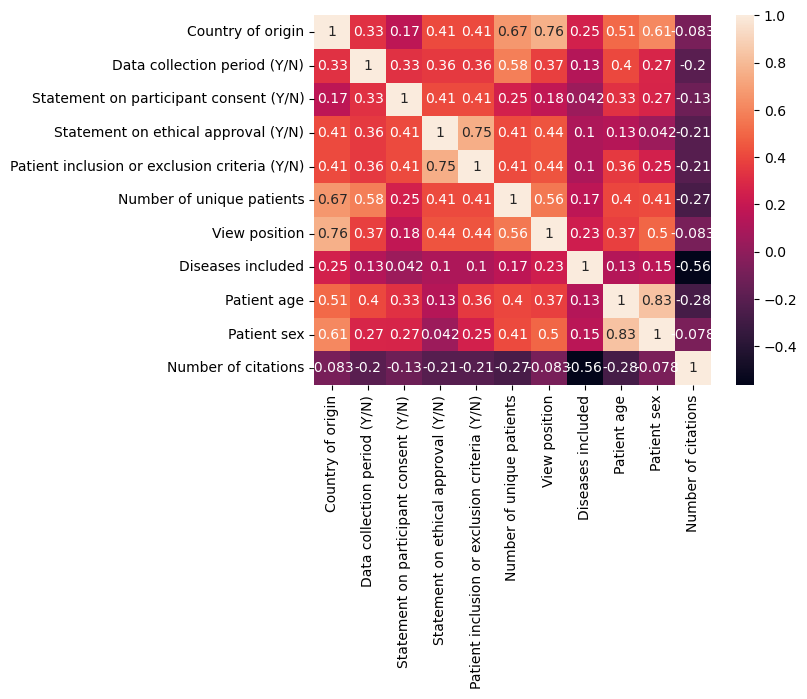

In [460]:
sns.heatmap(corr,annot=True)

## Most cited - patient age and sex included?

In [461]:
#number of citations:
citations_df

,index,Name,Number of citations
30,43,X-Ray Lung Image Dataset,0
1,4,Chest x-ray disease images,0
2,5,Chest X-Rays - Covid19 Pakistan,0
3,6,Chest X-Rays Dataset,0
23,27,Lung Diseases X-Rays (Grayscale),0
19,23,Detecting-COVID-19-in-X-ray-images,0
6,10,COVID 19 Xray Image Dataset with Huge Samples,0
8,12,Covid-19 chest x-ray detection dataset,0
9,13,COVID-19 Chest X-Ray Image Repository,0
18,22,CXR Sample for Diagnosis,0


In [463]:
#get which datasets report patient age and sex:
metadata = quality_df[['index','Patient age', 'Patient sex']]

In [464]:
metadata

,index,Patient age,Patient sex
0,1,1,1
1,4,0,0
2,5,0,0
3,6,0,0
4,8,1,1
5,9,1,1
6,10,0,0
7,11,0,0
8,12,0,0
9,13,0,0


In [465]:
#merge dataframes:
metadata_citations = citations_df.merge(metadata, on='index')

In [466]:
metadata_citations

,index,Name,Number of citations,Patient age,Patient sex
0,43,X-Ray Lung Image Dataset,0,0,0
1,4,Chest x-ray disease images,0,0,0
2,5,Chest X-Rays - Covid19 Pakistan,0,0,0
3,6,Chest X-Rays Dataset,0,0,0
4,27,Lung Diseases X-Rays (Grayscale),0,0,0
5,23,Detecting-COVID-19-in-X-ray-images,0,0,0
6,10,COVID 19 Xray Image Dataset with Huge Samples,0,0,0
7,12,Covid-19 chest x-ray detection dataset,0,0,0
8,13,COVID-19 Chest X-Ray Image Repository,0,0,0
9,22,CXR Sample for Diagnosis,0,0,0


In [467]:
#convert citations to integer:
metadata_citations['Number of citations'] = metadata_citations['Number of citations'].astype(int)

In [468]:
#sort by number of citations:
metadata_citations = metadata_citations.sort_values(by=['Number of citations'], ascending=False)

In [469]:
#pick the 15 most cited datasets (>30 citations):
top_15_metadata = metadata_citations.head(n=15)

In [470]:
top_15_metadata

,index,Name,Number of citations,Patient age,Patient sex
30,8,ChestX-ray14,3214,1,1
29,24,India,2988,0,0
28,21,COVIDx dataset,2567,1,1
27,9,CheXpert,1562,1,1
26,15,COVID-19 image data collection,1009,1,1
25,26,JRST,932,1,1
24,25,Indiana,518,0,0
23,36,SH,505,1,1
22,28,MC,505,1,1
21,34,Padchest,365,1,1


In [471]:
#calculate percent:
age_top = top_15_metadata.groupby('Patient age')[['Name']].count().reset_index()

In [473]:
gender_top = top_15_metadata.groupby('Patient sex')[['Name']].count().reset_index()

In [474]:
#calculate percent:
age_top['Percent']=age_top['Name']/age_top['Name'].sum()*100

In [475]:
age_top

,Patient age,Name,Percent
0,0,6,40.0
1,1,9,60.0


In [476]:
#calculate percent:
gender_top['Percent']=gender_top['Name']/gender_top['Name'].sum()*100

In [477]:
gender_top

,Patient sex,Name,Percent
0,0,5,33.333333
1,1,10,66.666667


In [478]:
gender = gender_top['Percent']
age = age_top['Percent']


In [479]:
gender.tolist()

[33.33333333333333, 66.66666666666666]

In [480]:
race = [100,0]

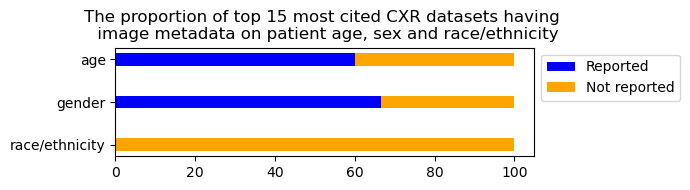

In [481]:
meta_data = ["race/ethnicity","gender", "age"]
reported = [0, 66.66666, 60]
not_reported = [100, 33.33333, 40]
plt.figure(figsize=(7, 2))
b1 = plt.barh(meta_data, reported, color="blue",height=0.3)

b2 = plt.barh(meta_data, not_reported, left=reported, height=0.3, color="orange")

plt.legend([b1, b2], ["Reported", "Not reported"], bbox_to_anchor=(1, 1))
plt.title("The proportion of top 15 most cited CXR datasets having \n image metadata on patient age, sex and race/ethnicity")
plt.tight_layout()
plt.savefig("metadata_top15.png")

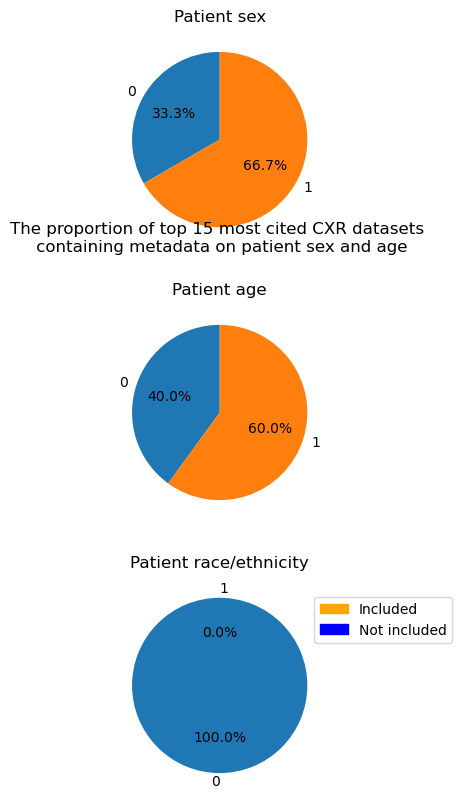

In [482]:
fig, (ax1, ax2, ax3) = plt.subplots(3, figsize=(6, 6))
fig.suptitle('The proportion of top 15 most cited CXR datasets \n containing metadata on patient sex and age')
labels = ["0","1"]
ax1.pie(gender,labels = labels,autopct = '%1.1f%%', startangle=90)
ax1.set_title('Patient sex')
ax2.pie(age,labels = labels,autopct = '%1.1f%%', startangle=90)
ax2.set_title('Patient age')
ax3.pie(race,labels = labels,autopct = '%1.1f%%', startangle=90)
ax3.set_title('Patient race/ethnicity')
included = mpatches.Patch(color='orange', label='Included')
not_included = mpatches.Patch(color='blue', label='Not included')
plt.legend(handles=[included, not_included], loc='center left', bbox_to_anchor=(0.9, 0.8))
plt.tight_layout()
plt.subplots_adjust(top=1.3)
plt.savefig('piecharts.png')

In [484]:
plot_top15 = top_15_metadata[['Name','Patient sex', 'Patient age']]

Text(0, 0.5, '')

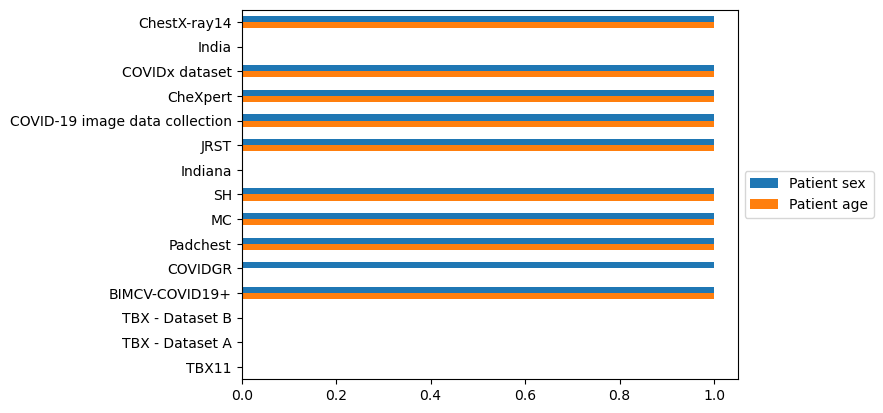

In [485]:
#plot which datasets report data on sex/age among top 15:
ax = plot_top15.plot.barh(x='Name')
ax.invert_yaxis()
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
ax.set_ylabel(None)

In [486]:
images_withmetadata = oa_df[['Name', 'Number of citations', 'Year of publication', 'Country of origin', 'Number of images', 'Patient age', 'Patient gender']]

In [487]:
images_withmetadata =  images_withmetadata.sort_values('Number of citations', ascending=False)

In [488]:
images_withmetadata

,Name,Number of citations,Year of publication,Country of origin,Number of images,Patient age,Patient gender
26,JRST,932,2000,"Japan, USA",247,247,247
40,TBX - Dataset B,93,2014,India,150,0,0
39,TBX - Dataset A,93,2014,India,156,0,0
41,TBX11,73,2020,China,11200,0,0
25,Indiana,518,2015,USA,8121,0,0
36,SH,505,2014,China,662,662,662
28,MC,505,2014,USA,138,138,138
34,Padchest,365,2019,Spain,160861,160855,160857
8,ChestX-ray14,3214,2017,USA,112120,112120,112120
24,India,2988,2017,China,5232,0,0


In [489]:
images_withmetadata = images_withmetadata[['Number of citations','Year of publication','Number of images','Patient age', 'Patient gender']].astype(int)

In [490]:
images_withmetadata = images_withmetadata[images_withmetadata['Number of citations']>70]

In [491]:
images_withmetadata

,Number of citations,Year of publication,Number of images,Patient age,Patient gender
26,932,2000,247,247,247
40,93,2014,150,0,0
39,93,2014,156,0,0
41,73,2020,11200,0,0
25,518,2015,8121,0,0
36,505,2014,662,662,662
28,505,2014,138,138,138
34,365,2019,160861,160855,160857
8,3214,2017,112120,112120,112120
24,2988,2017,5232,0,0


In [492]:
total = images_withmetadata['Number of images'].sum()

In [493]:
total

611478

In [494]:
age_total = images_withmetadata['Patient age'].sum()

In [495]:
gender_total =images_withmetadata['Patient gender'].sum()

In [496]:
images_age_top = (age_total/total*100)

In [497]:
images_gender_top = gender_total/total*100

In [498]:
not_images_age_top = 100-images_age_top

In [499]:
not_images_gender_top= 100-images_gender_top

In [500]:
images_age = [not_images_age_top,images_age_top]

In [501]:
images_age

[6.566875668462316, 93.43312433153768]

In [502]:
images_gender = [not_images_gender_top,  images_gender_top]

In [503]:
images_gender

[6.412495625353657, 93.58750437464634]

In [504]:
race = [100,0]

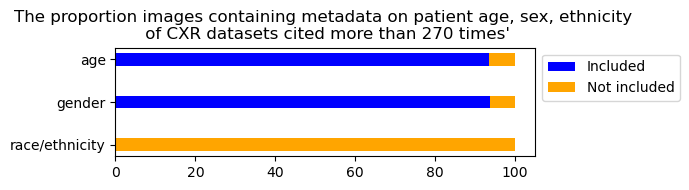

In [505]:
meta_data = ["race/ethnicity","gender", "age"]
reported = [0, 93.58750437464634, 93.43312433153768]
not_reported = [100, 6.412495625353657, 6.56687566846231]
plt.figure(figsize=(7, 2))
b1 = plt.barh(meta_data, reported, color="blue",height=0.3)

b2 = plt.barh(meta_data, not_reported, left=reported, height=0.3, color="orange")

plt.legend([b1, b2], ["Included", "Not included"], bbox_to_anchor=(1, 1))
plt.title("The proportion images containing metadata on patient age, sex, ethnicity \n of CXR datasets cited more than 270 times'")
plt.tight_layout()
plt.savefig("images_metadata_top15.png")

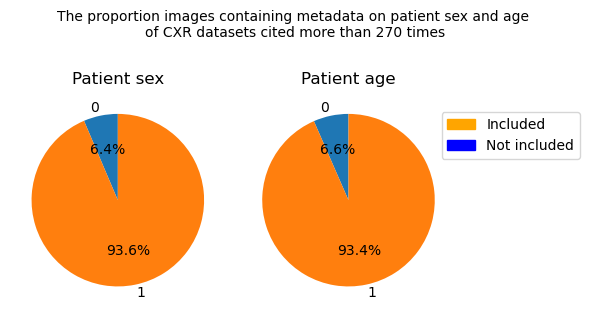

In [506]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(6, 6))
fig.suptitle('The proportion images containing metadata on patient sex and age \nof CXR datasets cited more than 270 times', fontsize=10)
labels = [0,1]
ax1.pie(images_gender,labels = labels,autopct = '%1.1f%%', startangle=90)
ax1.set_title('Patient sex')
ax2.pie(images_age,labels = labels,autopct = '%1.1f%%', startangle=90)
ax2.set_title('Patient age')
not_included = mpatches.Patch(color='blue', label='Not included')
included = mpatches.Patch(color='orange', label='Included')
plt.legend(handles=[included, not_included], loc='center left', bbox_to_anchor=(0.9, 0.8))
plt.tight_layout()
plt.subplots_adjust(top=1.3)
plt.savefig('piecharts.png')

In [507]:
total/100*44

269050.32

In [513]:
merge_df_cite_quality['quality']= merge_df_cite_quality.iloc[[0,1,2,3,4,5,6,7,8,9,10,11,12]].sum()

In [533]:
merge_df_cite_quality

,Country of origin,Year of dataset publication,Data collection period (Y/N),Statement on participant consent (Y/N),Statement on ethical approval (Y/N),Patient inclusion or exclusion criteria (Y/N),Number of images,Number of unique patients,View position,Diseases included,Patient age,Patient sex,Patient race/ethnicity,Number of citations,quality
0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,NaN
1,0,1,0,0,0,0,1,0,0,0,0,0,0,3214,NaN
2,1,1,1,0,0,0,1,1,1,1,0,0,0,1562,NaN
3,0,1,1,0,0,0,1,0,0,1,0,0,0,0,NaN
4,1,1,1,0,0,0,1,1,1,1,1,1,0,0,NaN
5,1,1,1,0,0,0,1,1,1,1,1,1,0,0,NaN
6,0,1,0,0,0,0,1,0,0,1,0,0,0,1,NaN
7,1,1,0,0,0,0,1,0,0,1,0,0,0,1009,NaN
8,0,1,0,0,0,0,1,0,0,1,0,0,0,28,NaN
9,0,1,0,0,0,0,1,0,0,1,0,0,0,0,NaN


In [ ]:
merge_df_cite_quality[[]]

In [545]:
merge_df_cite_quality['quality']= merge_df_cite_quality.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12]].sum(axis=1)/13

In [546]:
merge_df_cite_quality

,Country of origin,Year of dataset publication,Data collection period (Y/N),Statement on participant consent (Y/N),Statement on ethical approval (Y/N),Patient inclusion or exclusion criteria (Y/N),Number of images,Number of unique patients,View position,Diseases included,Patient age,Patient sex,Patient race/ethnicity,Number of citations,quality
0,1,1,1,1,1,1,1,1,1,1,1,1,0,0,0.923077
1,0,1,0,0,0,0,1,0,0,0,0,0,0,3214,0.153846
2,1,1,1,0,0,0,1,1,1,1,0,0,0,1562,0.538462
3,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0.307692
4,1,1,1,0,0,0,1,1,1,1,1,1,0,0,0.692308
5,1,1,1,0,0,0,1,1,1,1,1,1,0,0,0.692308
6,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0.230769
7,1,1,0,0,0,0,1,0,0,1,0,0,0,1009,0.307692
8,0,1,0,0,0,0,1,0,0,1,0,0,0,28,0.230769
9,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0.230769


In [548]:
citation_quality = merge_df_cite_quality[['Number of citations', 'quality']]

In [550]:
citation_quality = citation_quality[citation_quality['Number of citations']>70]

In [552]:
citation_quality['quality'].mean()

0.43195266272189353

In [553]:
merge_df_cite_quality['quality'].mean()

0.45230769230769224